# Assignment #4

READ ALL INSTRUCTIONS CAREFULLY

This assignment is a puzzle. You have been given a data set with some semi-informative column headers but no additional information about it. Your goal is to investigate the data, understand as much about it as you can, and report back what you find.

You are free to use any and all of the techniques we have covered this semester: EDA, data wrangling, visualization (scatter plots, line plots, histograms, jointplots, etc.), descriptive statistics (mean, median, variance, covariance, etc.), regression / model fitting, loss functions (MSE, MAE), R^2, cross-validation, bootstrapping, gradient descent, etc... 

There are many different ways to approach this assignment and be successful. I recommend starting simple and getting slowly more sophisticated as needed.

## Collaborators

You must work in groups of 2-3. You cannot work on this assignment alone. Your partners cannot be anyone you have partnered with previously on an assignment and they cannot be in your group for the semester project.

**Names of all collaborators go here** (including yourself):

## Tools

You are not allowed to use LLMs (including the LLM results that pop up in Google search). You may use search online for ideas, use StackExchange, and I highly encourage using Python library documentation.

Hint: It may be useful to use the sklearn library for model fitting (and not to implement model fitting or optimization by hand).

## Submission Instructions

You must submit two files. One is your **Jupyter notebook** that you use to explore and analyze the data. The second file is a separate **PDF** reporting, presenting, and explaining your results with no code in it.

**Only one person** in your group should submit the assignment files on Canvas. Be sure everyone's names are listed under collaborators in both the notebook and the PDF so everyone gets credit!

## Potentially Helpful Documentation


https://scikit-learn.org/stable/api/sklearn.model_selection.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/api/sklearn.metrics.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

# Your Code Below

## Imports and CoW

In [138]:
# Add all of your import statements here. ONLY include the imports you actually use. There are useful tools in the scikit-learn library for regression and model fitting, but you are not required to use it. If you use it, you will need to install it into your virtual environment.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [139]:
# Enforce Copy-on-Write (CoW) semantics here
pd.set_option('mode.copy_on_write', True)

## Project Folder Organization and File Reading

You must read in the given data file using relative paths, as shown in previous assignments. Organize your work to be in a project folder, with src and data subfolders. Place your solution notebook in the src folder, and the given data file in the data folder.

In [140]:
# Read in the data file (using relative paths for reproducibility). It should be able to download your notebook, put it in the src folder of my project folder, and run it without changing anything.
cwd = Path().cwd()
data_path = Path('data/mystery-1.csv')
file = cwd / data_path
if not file.exists():
    raise FileNotFoundError(f'Dataset file not found: {file}')

mystery_df = pd.read_csv(file, delimiter='|')

In [141]:
mystery_df.head()

x           y          z  ...         d3            d4     c
0  45.257043  109.764179  38.057596  ...  37.863842  94095.637152  11.0
1  45.146703  109.814680  40.922755  ...  37.872534  93969.141494   3.0
2  47.732288  109.733472  39.181964  ...  37.671144  93724.024307  11.0
3  46.393936  109.376867  37.073853  ...  37.774738  93377.854892  10.0
4  52.908700  109.607200  37.583851  ...  37.291647  93101.403795   0.0

[5 rows x 8 columns]

In [142]:
mystery_df.columns

Index(['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4', 'c'], dtype='object')

In [143]:
df = mystery_df[mystery_df['x'] > 0]

In [144]:
for col in df:
    print(df[col].describe(), end='\n\n******************\n\n')

count    1846.000000
mean       49.225695
std        16.713001
min        10.520750
25%        36.033403
50%        47.551269
75%        62.237845
max        93.248123
Name: x, dtype: float64

******************

count    1846.000000
mean       57.955099
std        26.847766
min        10.135119
25%        32.681073
50%        57.714450
75%        81.930778
max       109.814680
Name: y, dtype: float64

******************

count    1846.000000
mean       39.997406
std         2.974248
min        30.190542
25%        37.977585
50%        39.945382
75%        42.018724
max        48.870364
Name: z, dtype: float64

******************

count    1846.000000
mean      143.226810
std       141.325319
min      -203.894934
25%        27.098028
50%       143.530673
75%       253.332106
max       474.250238
Name: d1, dtype: float64

******************

count    1846.000000
mean        7.622558
std        43.828991
min       -33.540389
25%       -28.148776
50%       -10.101627
75%        32.481449


In [145]:
df

x           y          z  ...         d3            d4     c
0     45.257043  109.764179  38.057596  ...  37.863842  94095.637152  11.0
1     45.146703  109.814680  40.922755  ...  37.872534  93969.141494   3.0
2     47.732288  109.733472  39.181964  ...  37.671144  93724.024307  11.0
3     46.393936  109.376867  37.073853  ...  37.774738  93377.854892  10.0
4     52.908700  109.607200  37.583851  ...  37.291647  93101.403795   0.0
...         ...         ...        ...  ...        ...           ...   ...
1849  69.127272   15.469881  44.189618  ...  36.593340  -4790.832560  12.0
1850  79.062879   19.100656  40.525671  ...  36.857181  -4936.105016   4.0
1851  67.099925   10.135119  37.653193  ...  36.618824  -5086.125698   1.0
1852  76.684617   16.157545  36.884724  ...  36.727196  -5124.376623   1.0
1853  77.070558   11.330552  40.954200  ...  36.745135  -6575.228052   1.0

[1846 rows x 8 columns]

In [146]:
val_data = df.drop_duplicates()
columns = val_data.columns

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        mean_v1 = val_data[columns[i]].mean()
        mean_v2 = val_data[columns[j]].mean()
        var_v1 = val_data[columns[i]].var()
        var_v2 = val_data[columns[j]].var()
        correlation_12 = val_data[columns[i]].corr(val_data[columns[j]])
                
        print(f"\n {columns[i]}, {columns[j]}:")
        print(f"  Mean of v1:      {mean_v1:.1f}")
        print(f"  Mean of v2:      {mean_v2:.1f}")
        print(f"  Variance of v1:  {var_v1:.1f}")
        print(f"  Variance of v2:  {var_v2:.1f}")
        print(f"  Correlation (v1, v2): {correlation_12:.2f}")
        print(f"  Sample size:    {len(val_data)}") 




 x, y:
  Mean of v1:      49.2
  Mean of v2:      58.0
  Variance of v1:  279.3
  Variance of v2:  720.8
  Correlation (v1, v2): -0.07
  Sample size:    1846

 x, z:
  Mean of v1:      49.2
  Mean of v2:      40.0
  Variance of v1:  279.3
  Variance of v2:  8.8
  Correlation (v1, v2): 0.01
  Sample size:    1846

 x, d1:
  Mean of v1:      49.2
  Mean of v2:      143.2
  Variance of v1:  279.3
  Variance of v2:  19972.8
  Correlation (v1, v2): 0.76
  Sample size:    1846

 x, d2:
  Mean of v1:      49.2
  Mean of v2:      7.6
  Variance of v1:  279.3
  Variance of v2:  1921.0
  Correlation (v1, v2): 0.93
  Sample size:    1846

 x, d3:
  Mean of v1:      49.2
  Mean of v2:      37.8
  Variance of v1:  279.3
  Variance of v2:  0.9
  Correlation (v1, v2): -0.91
  Sample size:    1846

 x, d4:
  Mean of v1:      49.2
  Mean of v2:      28732.6
  Variance of v1:  279.3
  Variance of v2:  715664205.1
  Correlation (v1, v2): -0.12
  Sample size:    1846

 x, c:
  Mean of v1:      49.2
  Mea

In [147]:
scale = np.arange(len(df))

In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [149]:
# Will use this to calculate the loss with the related variables

loss = dict()

In [150]:
loss

{}

In [151]:
columns

Index(['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4', 'c'], dtype='object')

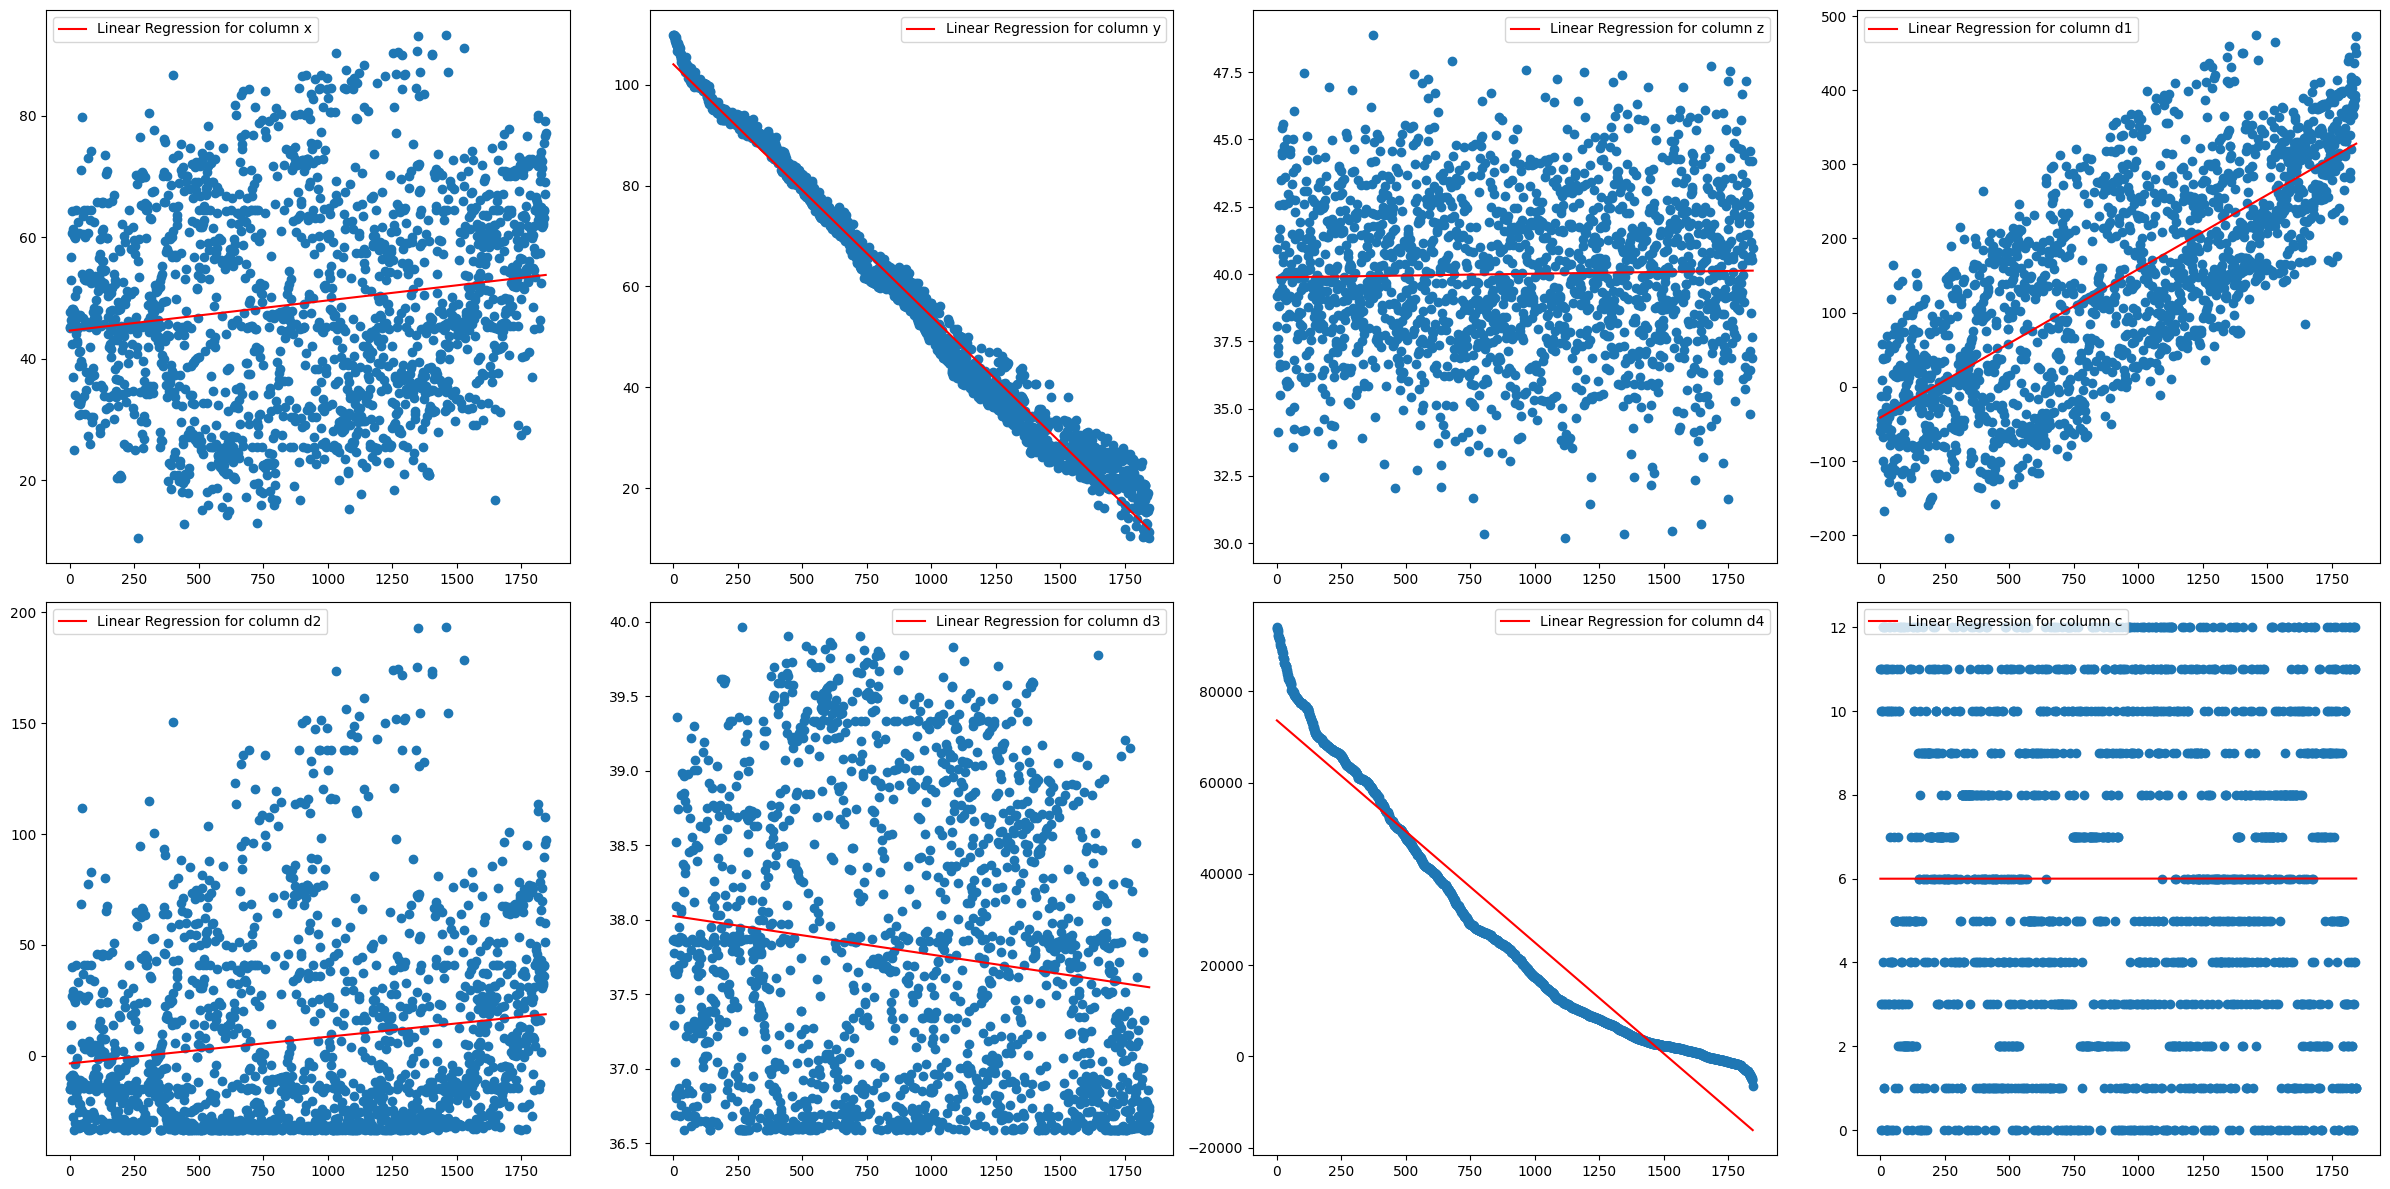




 POLYNOMIAL DEGREE OF 1




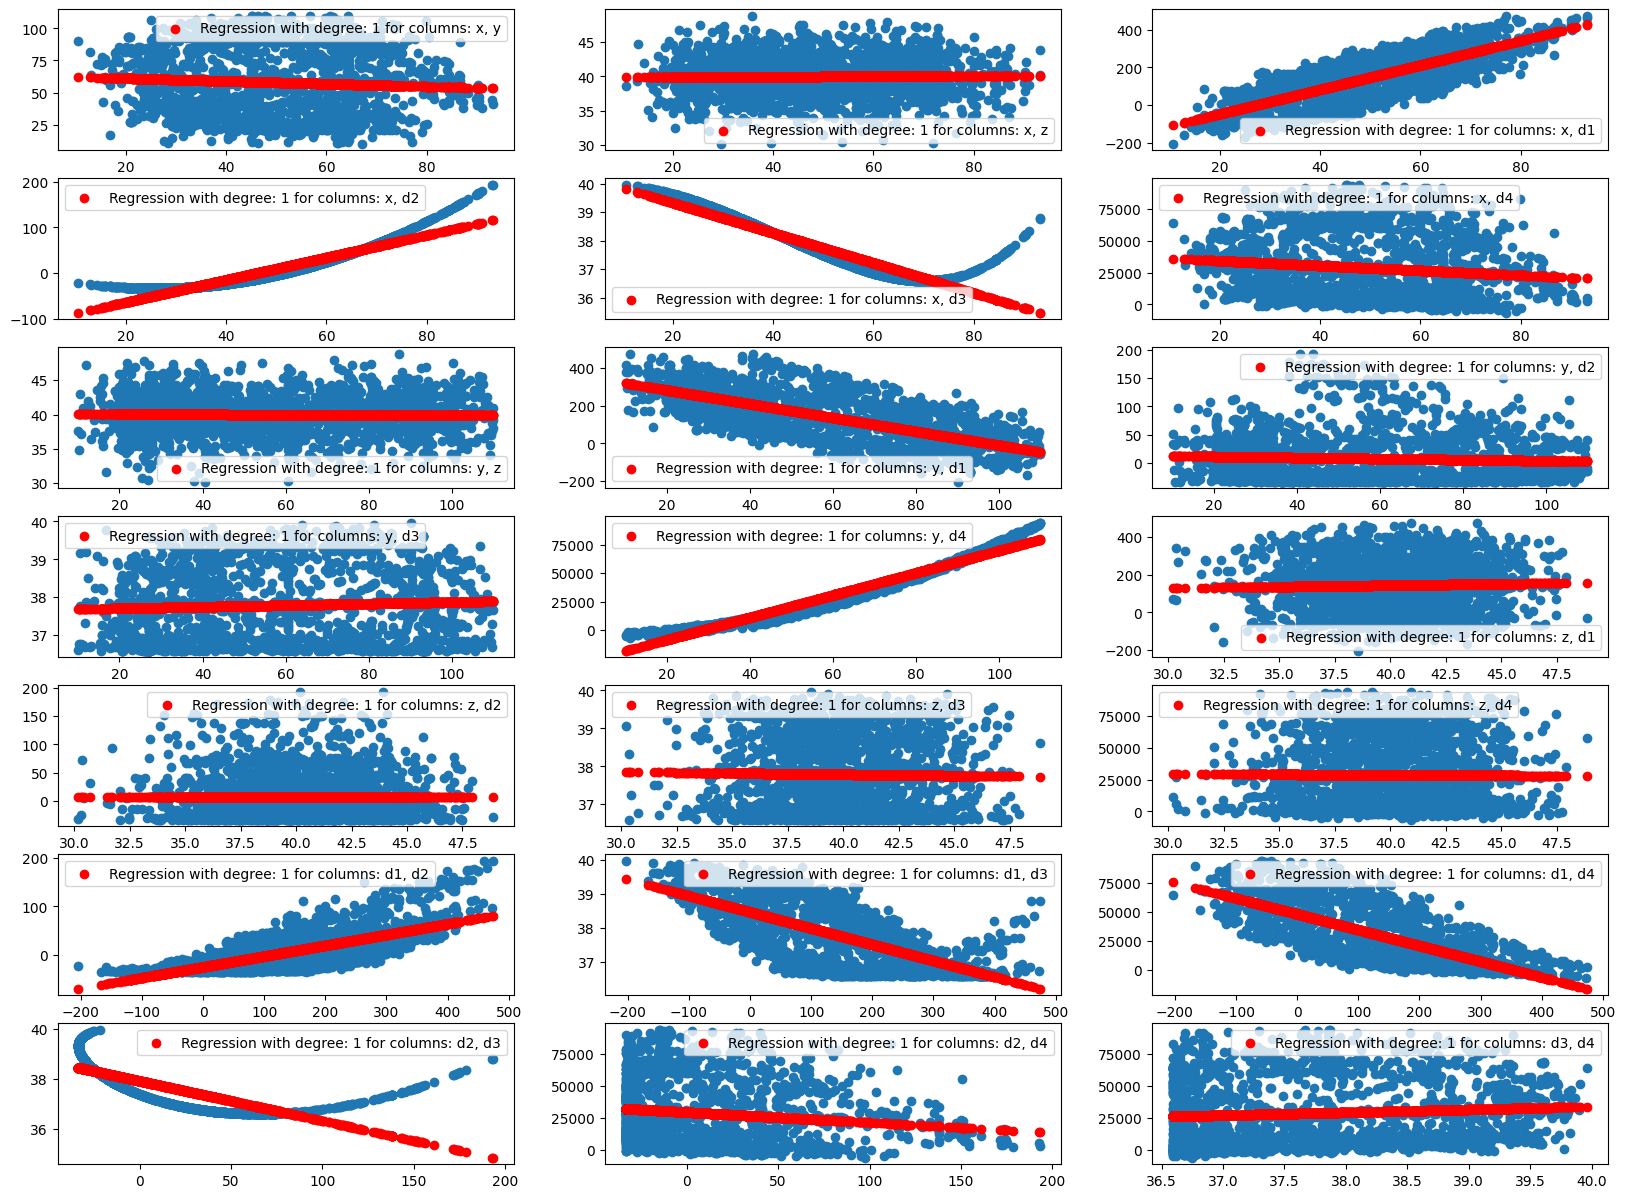




 POLYNOMIAL DEGREE OF 2




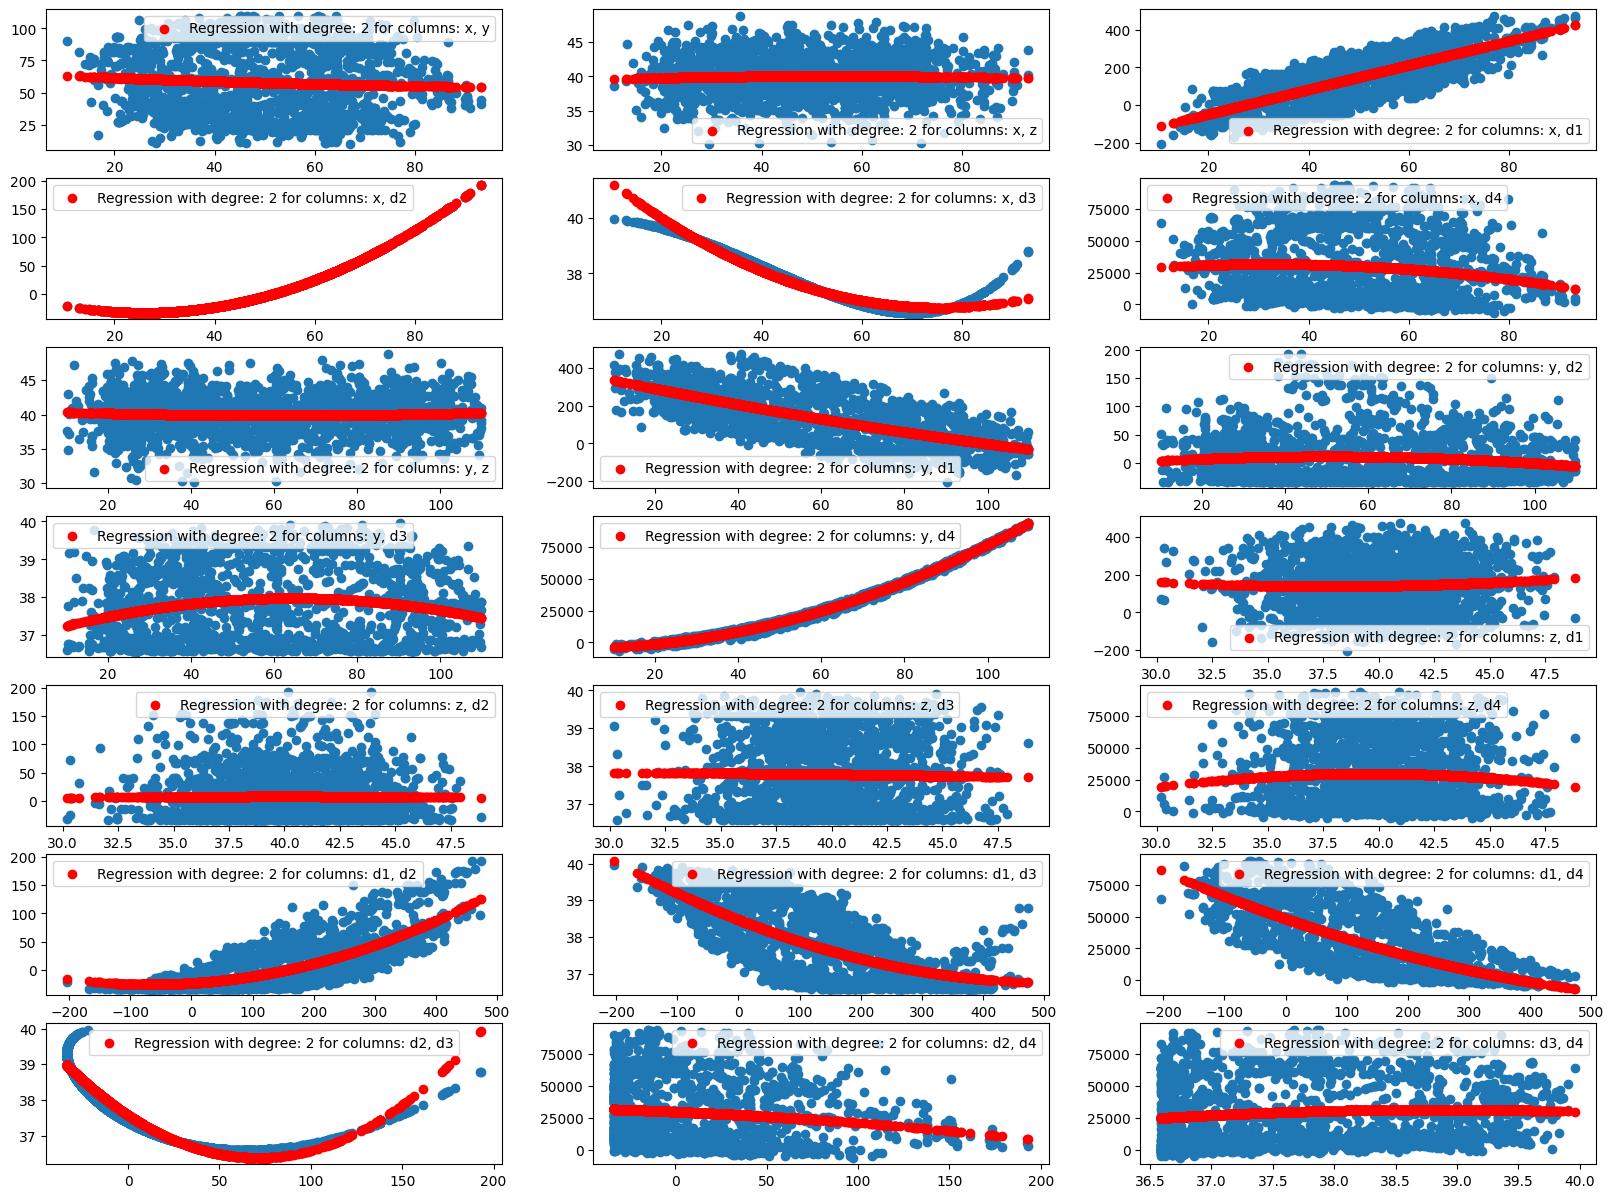




 POLYNOMIAL DEGREE OF 3




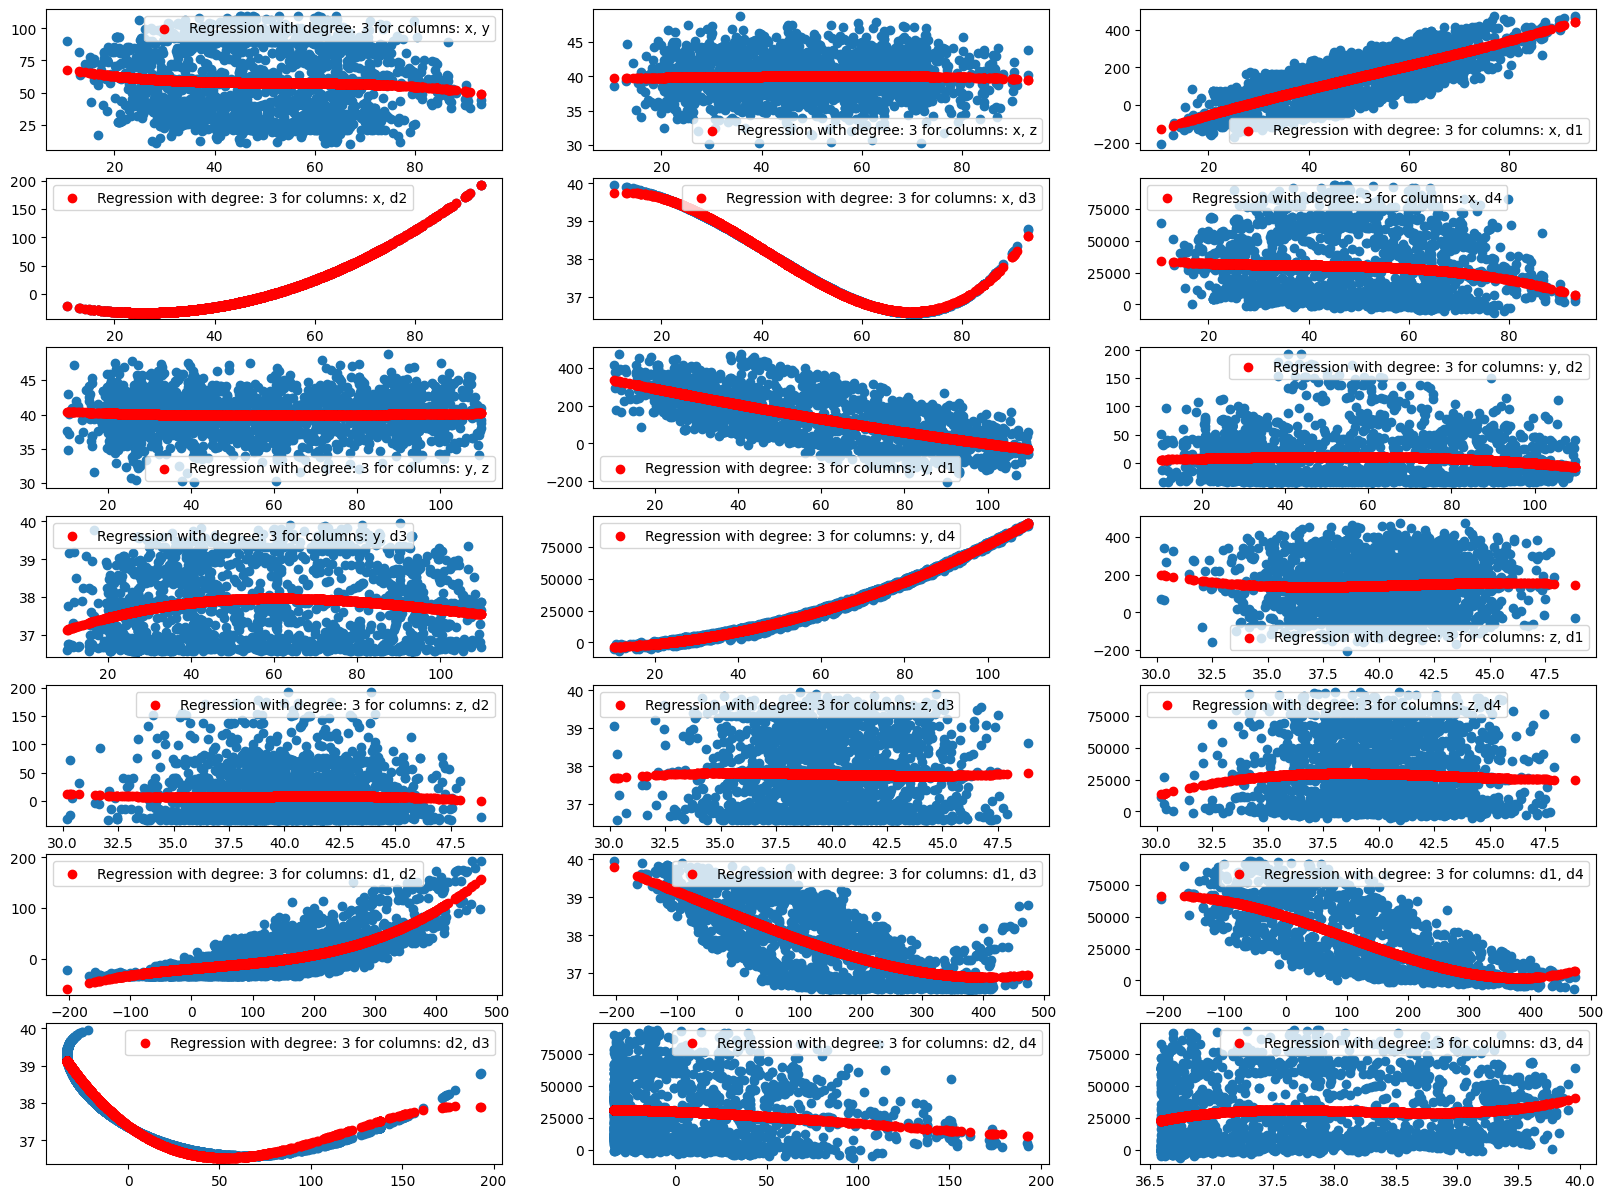




 POLYNOMIAL DEGREE OF 4




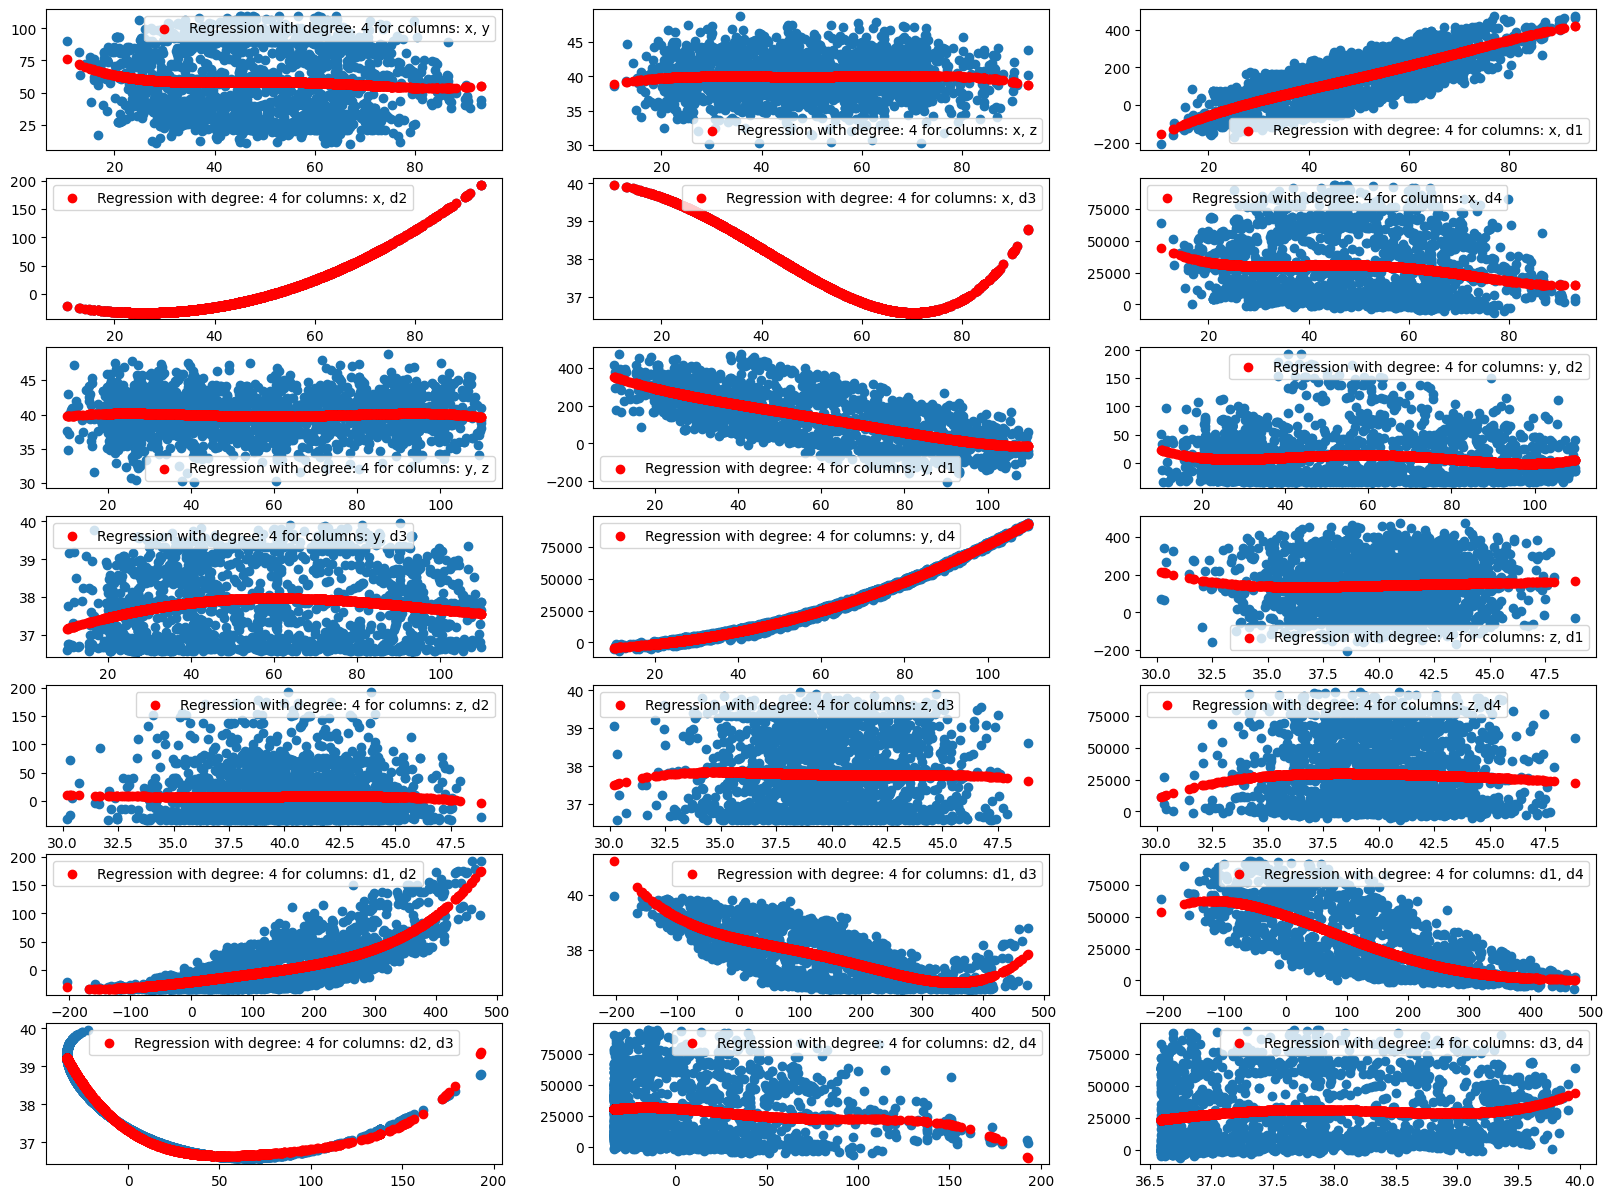




 POLYNOMIAL DEGREE OF 5




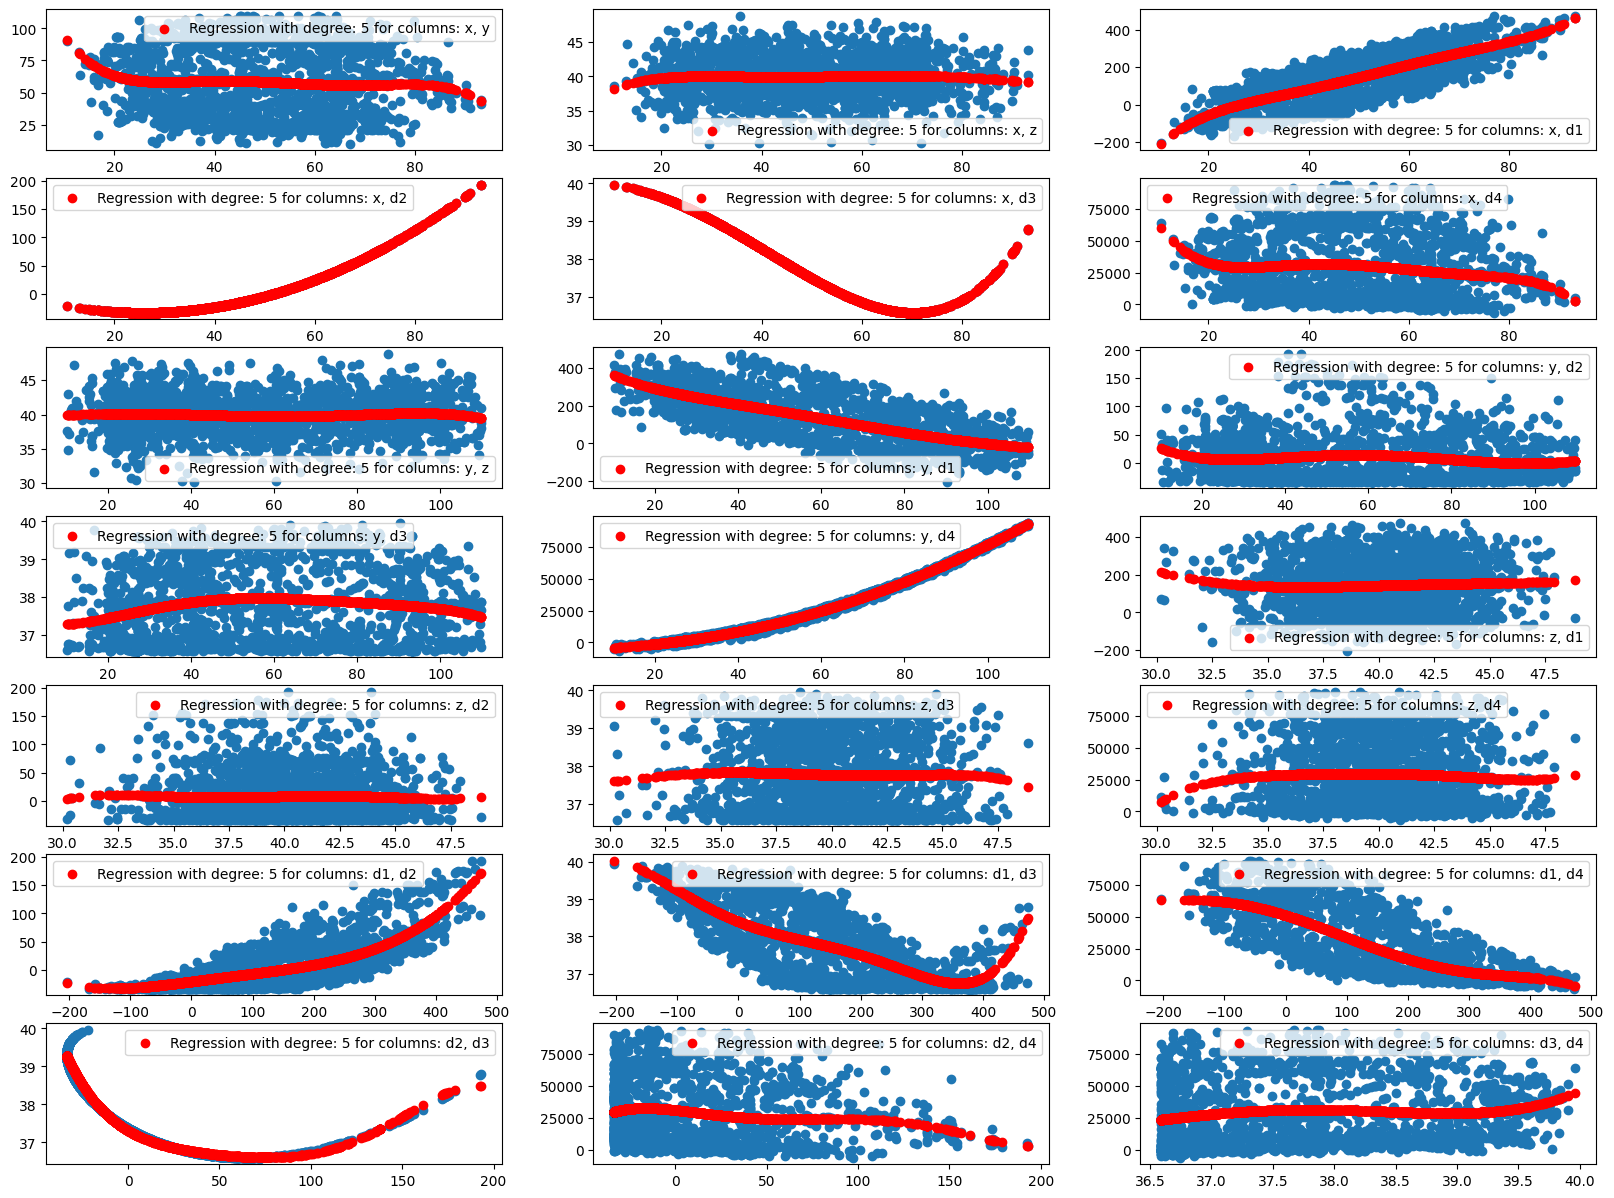

In [152]:

########################################################################################################
#                                  Every column  Individually                                          #
########################################################################################################

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

for i in range(len(columns)):

    x_scale = np.arange(len(df[columns[i]])).reshape(-1, 1)

    reg = LinearRegression().fit(x_scale, df[columns[i]].values)

    y_hat = reg.predict(x_scale)

    axes[i // 4, i % 4].plot(x_scale, y_hat, c='r', label=f'Linear Regression for column {columns[i]}')
    axes[i // 4, i % 4].scatter(x_scale, df[columns[i]])
    axes[i // 4, i % 4].legend()

    # loss[f'{columns[i]}'] = mean_squared_error(df[columns[i]], y_hat)
    
plt.tight_layout()
plt.show()


########################################################################################################
#                             Every Two column Combo POLYNOMIAL (1->5)                                 #
########################################################################################################


for d in range(1,6):

    print(f'\n\n\n POLYNOMIAL DEGREE OF {d}\n\n\n', end='')

    fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20,15))
    count = 0
    for i in range(len(columns) - 1):
        for j in range(i+1, len(columns) - 1):
            poly = PolynomialFeatures(degree=d)
            x_poly = poly.fit_transform(df[columns[i]].values.reshape(-1, 1))

            reg = LinearRegression().fit(x_poly, df[columns[j]].values)

            y_hat = reg.predict(x_poly)

            
            axes[count // 3, count % 3].scatter(df[columns[i]], df[columns[j]])
            axes[count // 3, count % 3].scatter(df[columns[i]], y_hat, c='r', label=f'Regression with degree: {d} for columns: {columns[i]}, {columns[j]}')
            axes[count // 3, count % 3].legend()
            
            count += 1

            loss[f'{columns[i]}, {columns[j]}, {d}'] = mean_squared_error(df[columns[j]], y_hat)

    plt.show()


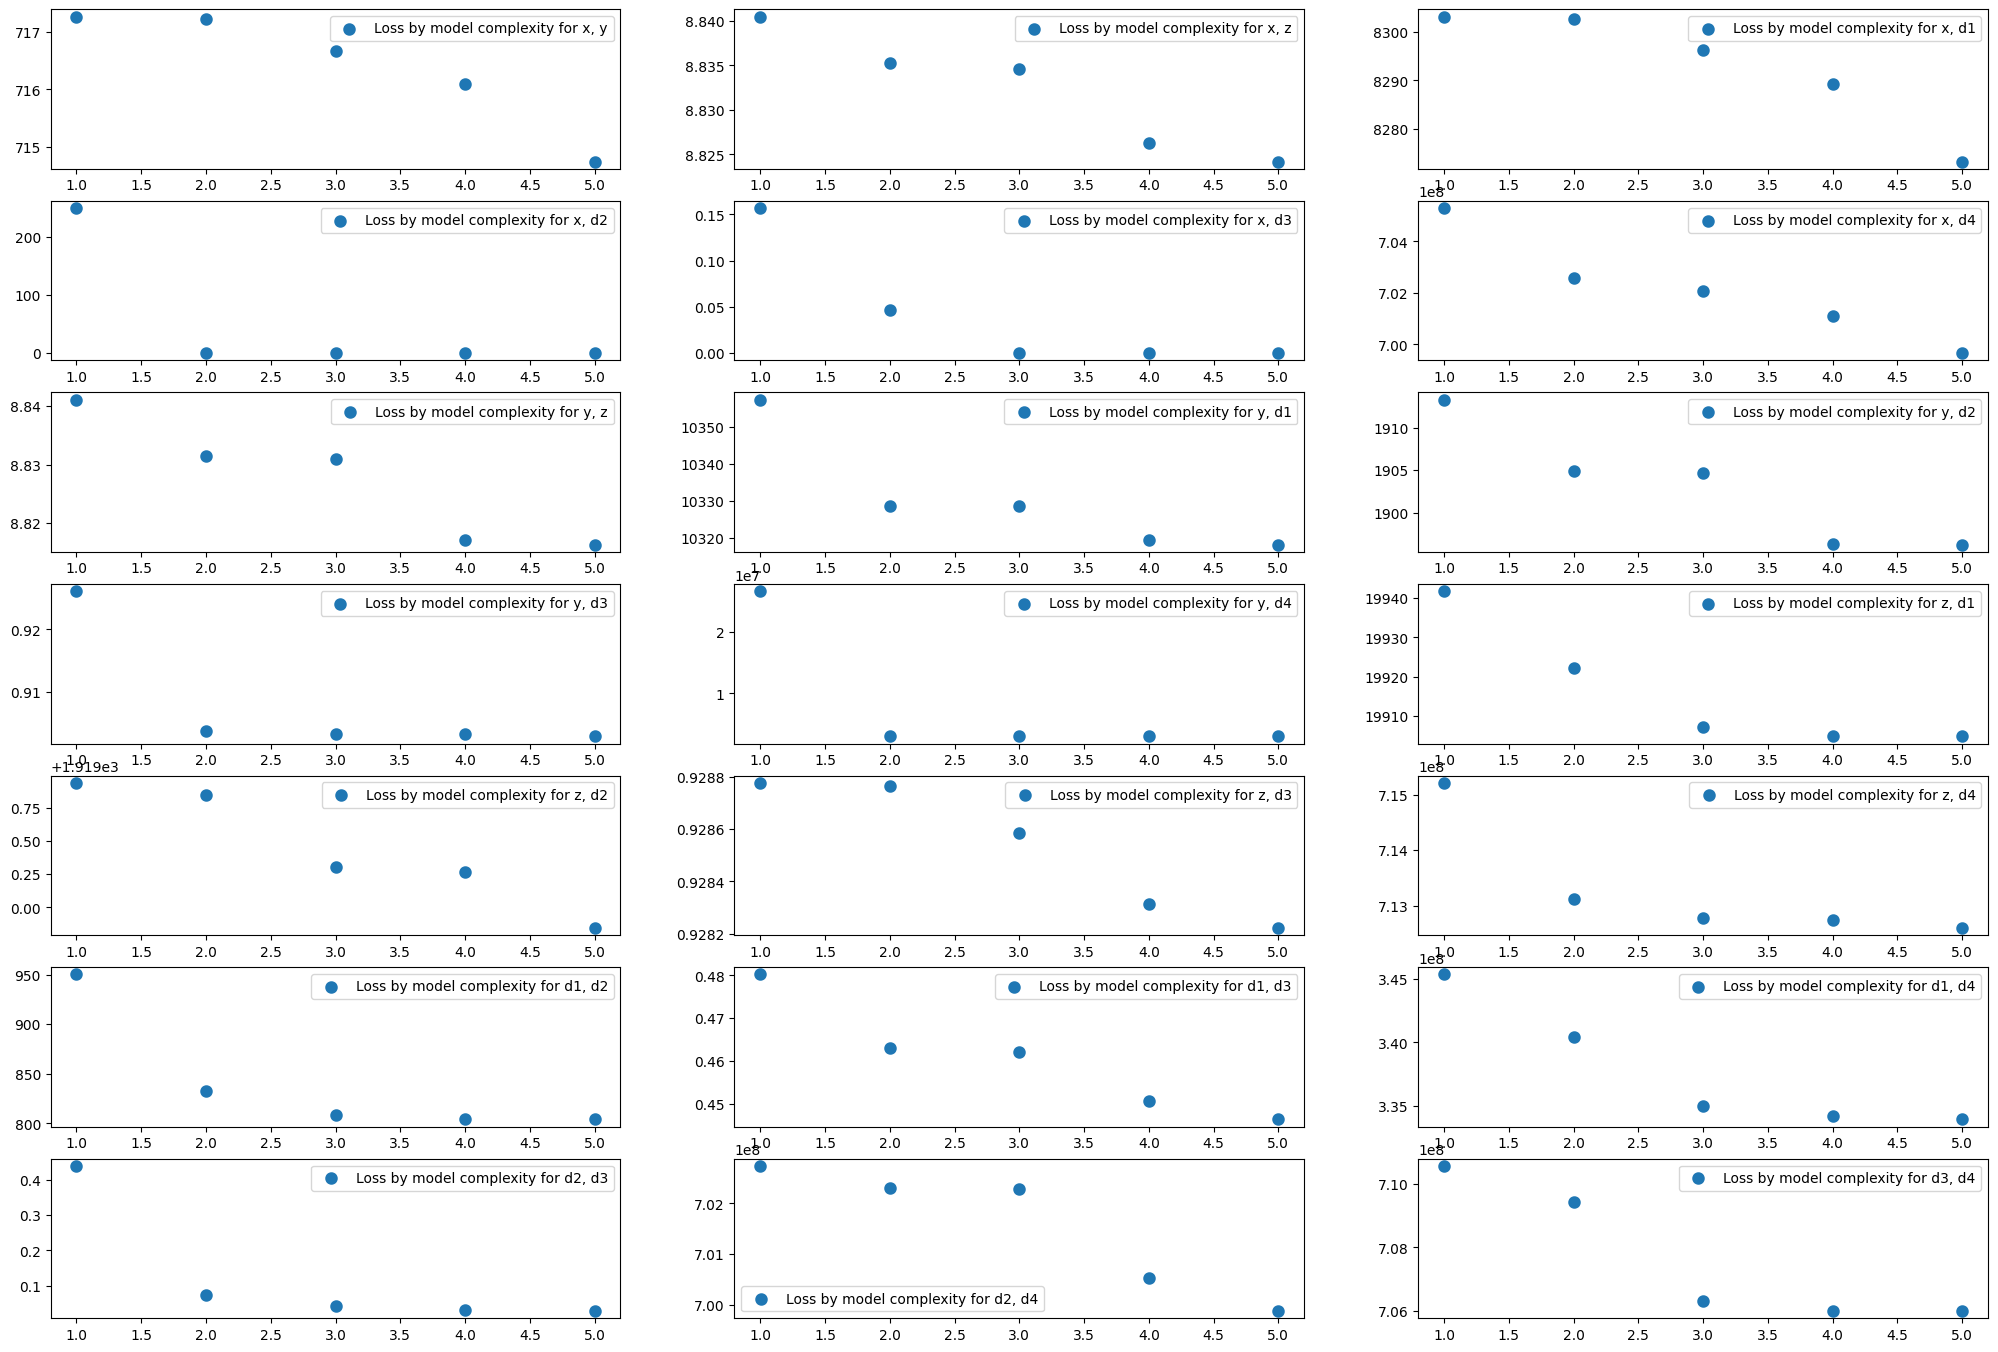

In [164]:
####################################################################################################
#                     LOSS BY POLYNOMIAL FOR COLUMN COMBINATIONS                                   #
####################################################################################################

fig, axes = plt.subplots(nrows=7, ncols=3, figsize = (25, 17))
count = 0
degrees = np.arange(5) + 1
for i in range(len(columns) - 1):
    for j in range(i + 1, len(columns) - 1):
        temp = list()
        for d in range(1, 6):
            temp.append(loss[f'{columns[i]}, {columns[j]}, {d}'])

        ax = axes[count // 3, count % 3]
        
        ax.scatter(degrees, temp, label=f'Loss by model complexity for {columns[i]}, {columns[j]}', linewidths=3)
        
        ax.legend()
        

        count += 1
plt.show()


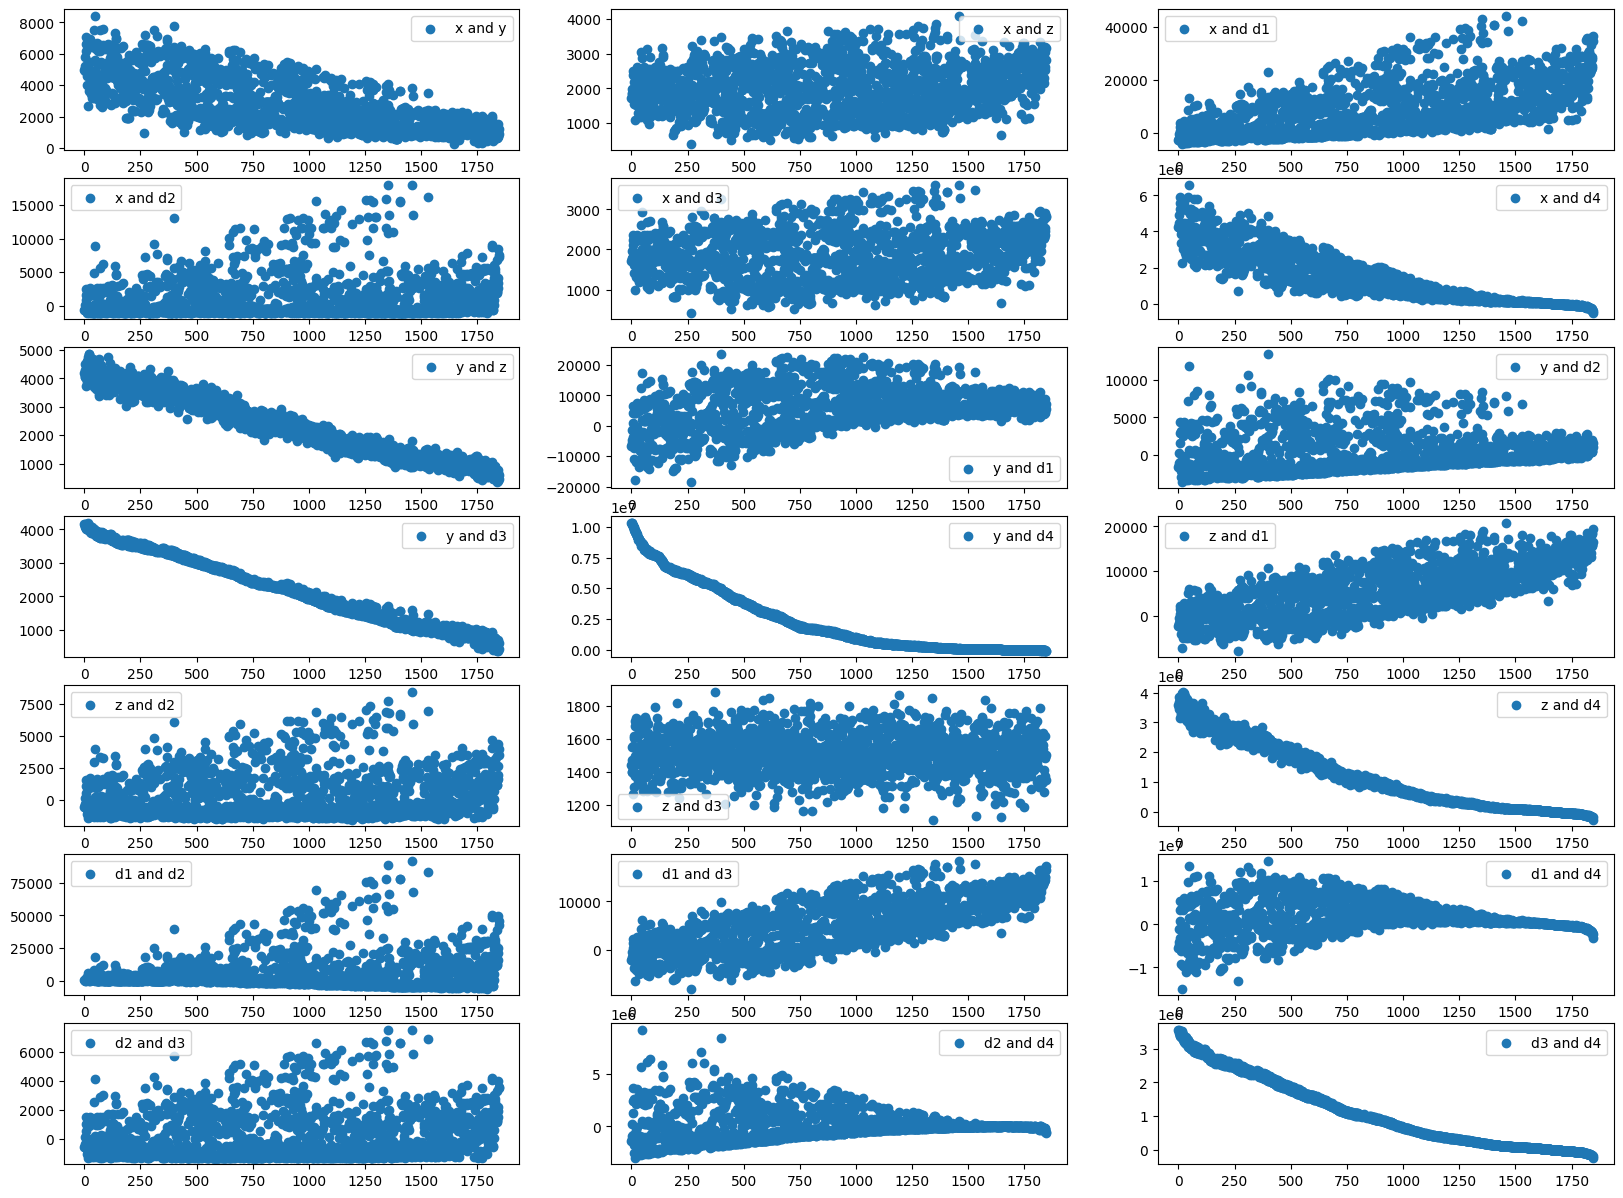

In [158]:
#################################################################################################
#                          EVERY COMBINATION OF COLUMNS TIMES EACH OTHER                        #
#################################################################################################
fig, axes = plt.subplots(nrows=7, ncols=3, figsize = (20, 15))
count = 0

for i in range(len(columns) - 1):
    for j in range(i+1, len(columns) - 1):
        axes[count // 3, count % 3 ].scatter(scale, df[columns[i]] * df[columns[j]], label=f'{columns[i]} and {columns[j]}')
        axes[count // 3, count % 3 ].legend()
        count += 1
    
plt.show()

In [155]:
grouped_by_c = df.sort_values(by='c', ascending=True)

grouped_by_c.head()

x         y          z  ...         d3            d4    c
1841  63.1651   13.0687  36.435312  ...  36.728396  -3931.955363  0.0
1840  63.4215   15.3764  41.906166  ...  36.719066  -3861.300641  0.0
4     52.9087  109.6072  37.583851  ...  37.291647  93101.403795  0.0
1816  66.2421   20.7610  40.744127  ...  36.636272  -2554.844856  0.0
62    37.7805  101.5303  45.024576  ...  38.456932  80045.476104  0.0

[5 rows x 8 columns]

In [231]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x_df = df[['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4']]
y_df = df[['c']]

y_df.head()

 
X_train, X_Test, Y_Train, Y_Test = train_test_split(x_df, y_df, test_size = 0.2)


tree_reg = DecisionTreeClassifier(max_depth=20)
tree_reg.fit(X_train, Y_Train)

y_hat = tree_reg.predict(X_Test)
accuracy = accuracy_score(y_pred=y_hat, y_true=Y_Test['c'])
print(accuracy) 


0.42162162162162165


In [216]:
from sklearn import tree

print(tree.export_text(tree_reg, feature_names=best_combo))

|--- feature_4 <= -33.53
|   |--- feature_0 <= 25.51
|   |   |--- class: 3.0
|   |--- feature_0 >  25.51
|   |   |--- feature_5 <= 39.31
|   |   |   |--- feature_2 <= 40.39
|   |   |   |   |--- feature_0 <= 25.96
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_0 >  25.96
|   |   |   |   |   |--- feature_3 <= -82.43
|   |   |   |   |   |   |--- feature_1 <= 96.14
|   |   |   |   |   |   |   |--- class: 6.0
|   |   |   |   |   |   |--- feature_1 >  96.14
|   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |--- feature_3 >  -82.43
|   |   |   |   |   |   |--- feature_5 <= 39.28
|   |   |   |   |   |   |   |--- class: 11.0
|   |   |   |   |   |   |--- feature_5 >  39.28
|   |   |   |   |   |   |   |--- feature_3 <= 53.94
|   |   |   |   |   |   |   |   |--- feature_3 <= 2.17
|   |   |   |   |   |   |   |   |   |--- class: 10.0
|   |   |   |   |   |   |   |   |--- feature_3 >  2.17
|   |   |   |   |   |   |   |   |   |--- class: 12.0
|   |   |   |   |   |   |   

In [ ]:
mystery_df.shape

(1854, 8)

In [ ]:
mystery_df.isna().sum()

x     0
y     0
z     0
d1    0
d2    0
d3    0
d4    0
c     0
dtype: int64

In [ ]:
mystery_df.dtypes

x     float64
y     float64
z     float64
d1    float64
d2    float64
d3    float64
d4    float64
c     float64
dtype: object

The line plot below shows the extreme outlier in all of the 'x', 'y', and 'z' column

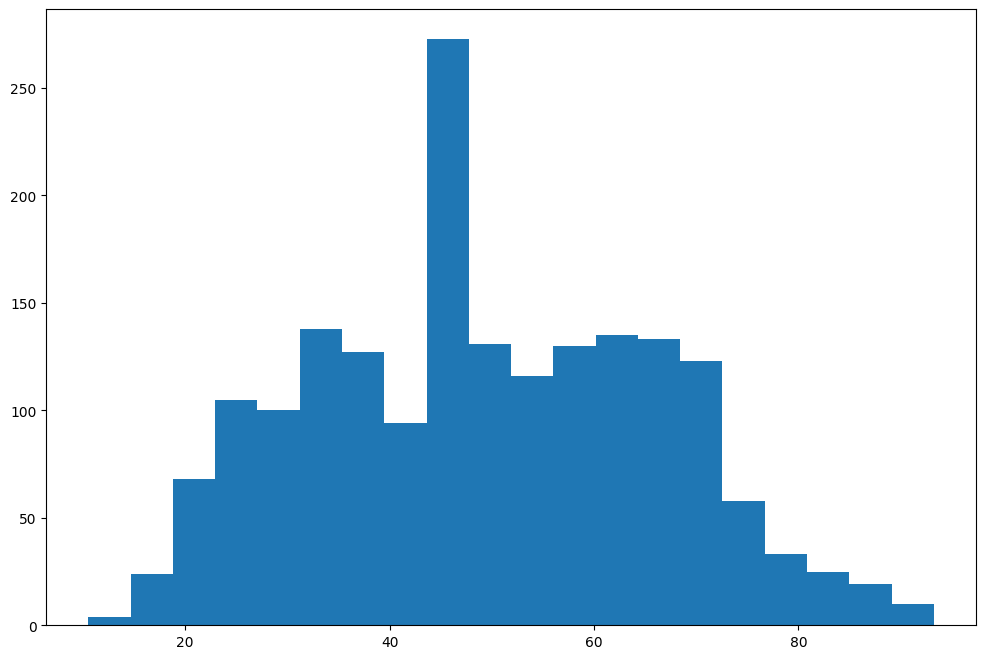

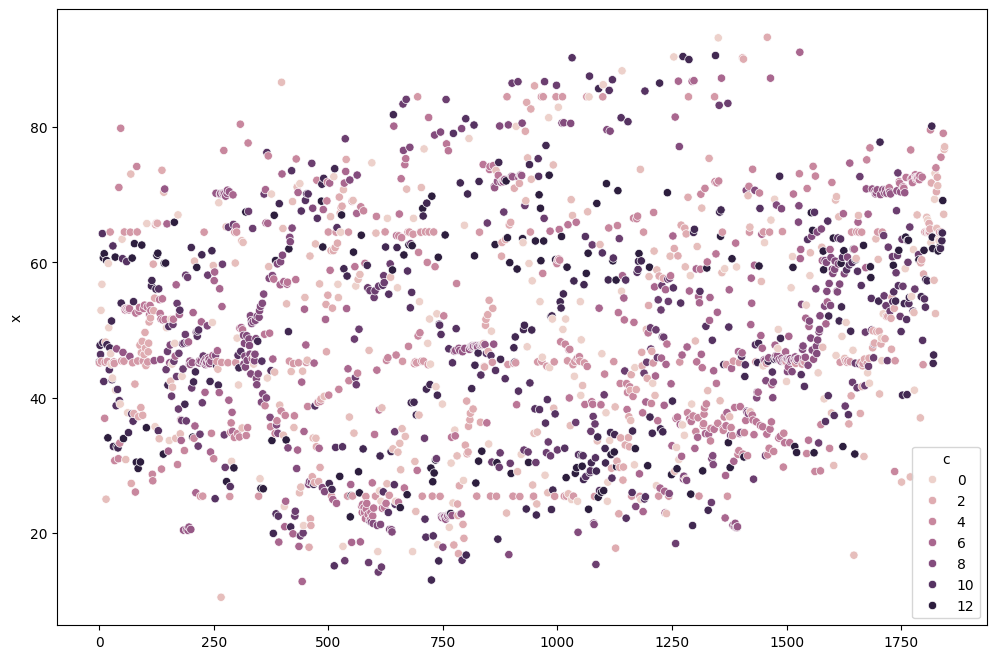

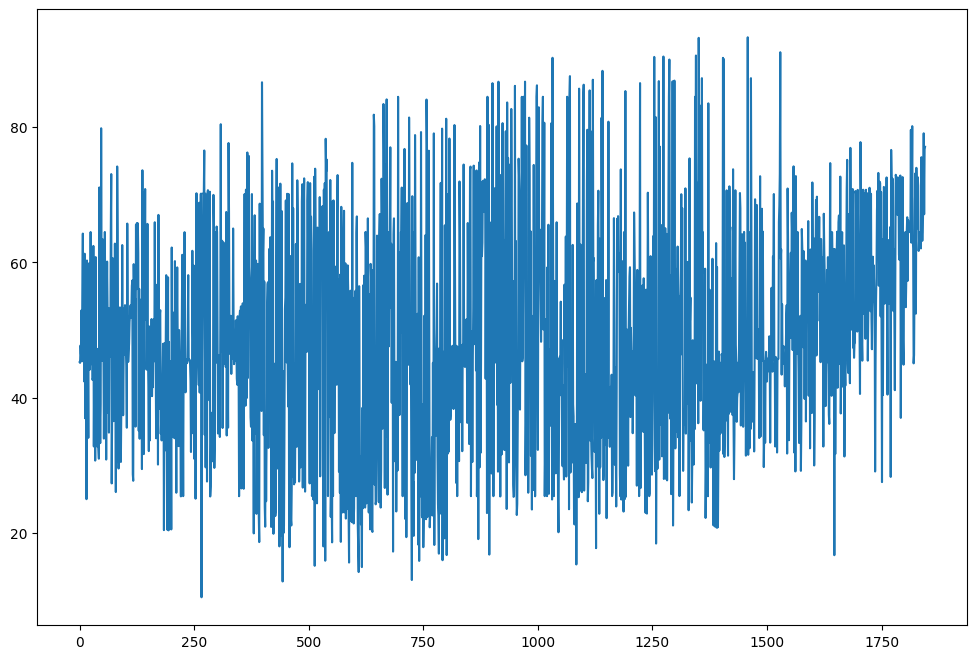

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['x'], bins=20)
plt.show()

plt.figure(figsize=(12,8))
sns.scatterplot(df, x=scale, y='x', hue='c')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(scale, df['x'])
plt.show()

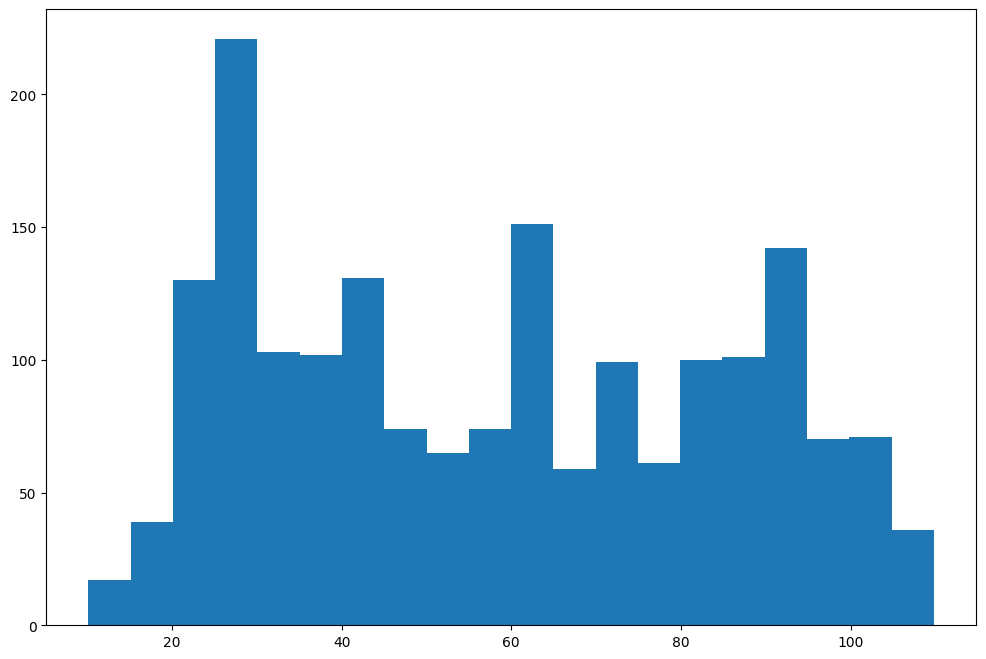

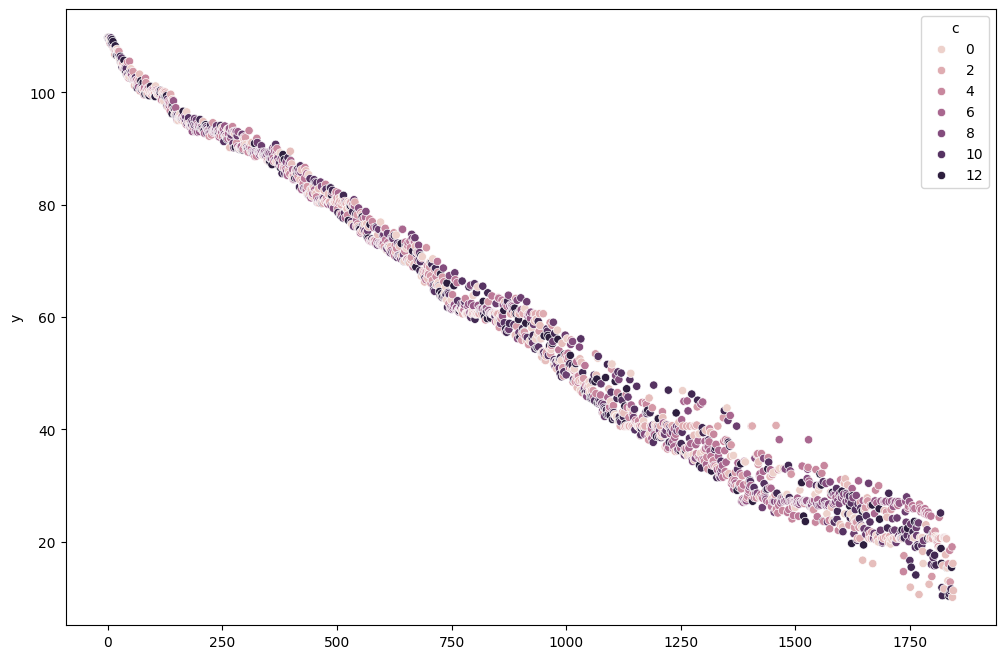

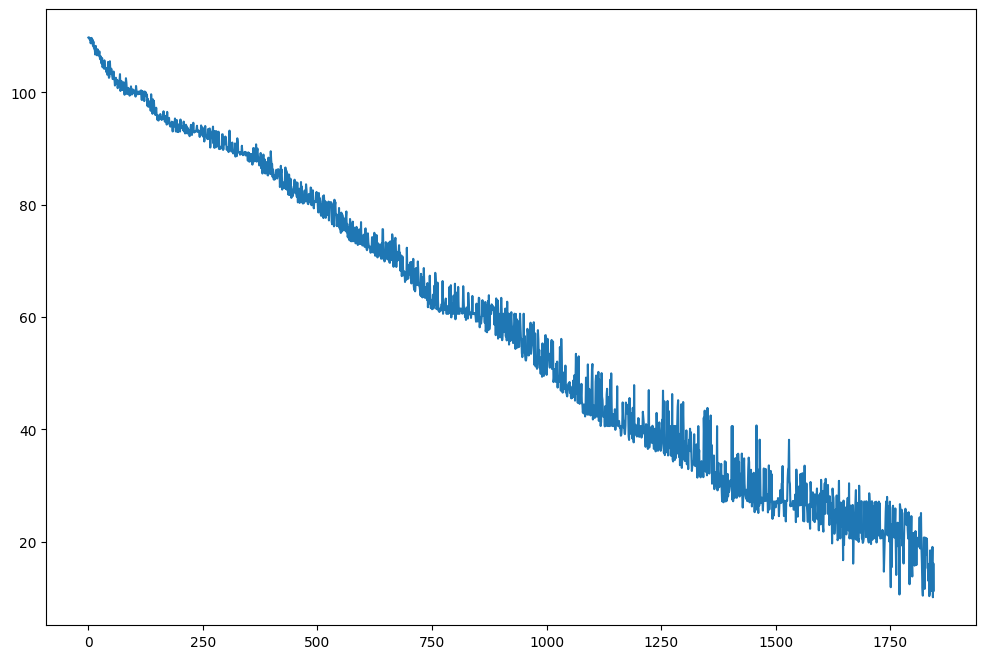

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['y'], bins=20)
plt.show()

plt.figure(figsize=(12,8))
sns.scatterplot(df, x=scale, y='y', hue='c')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(scale, df['y'])
plt.show()

In [ ]:
# Attempt to use linear regression to fit the line.


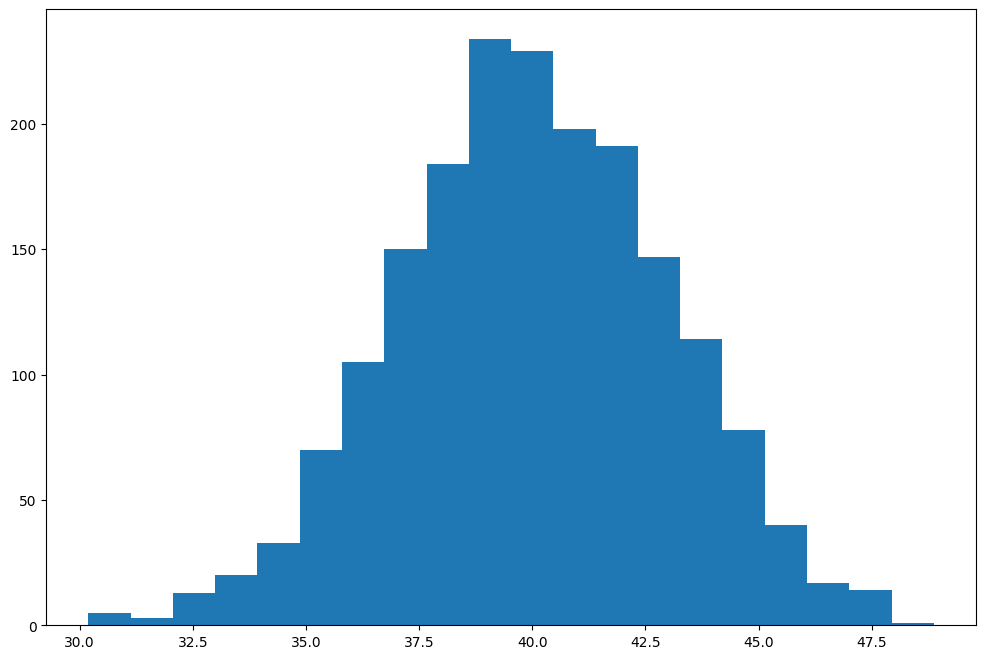

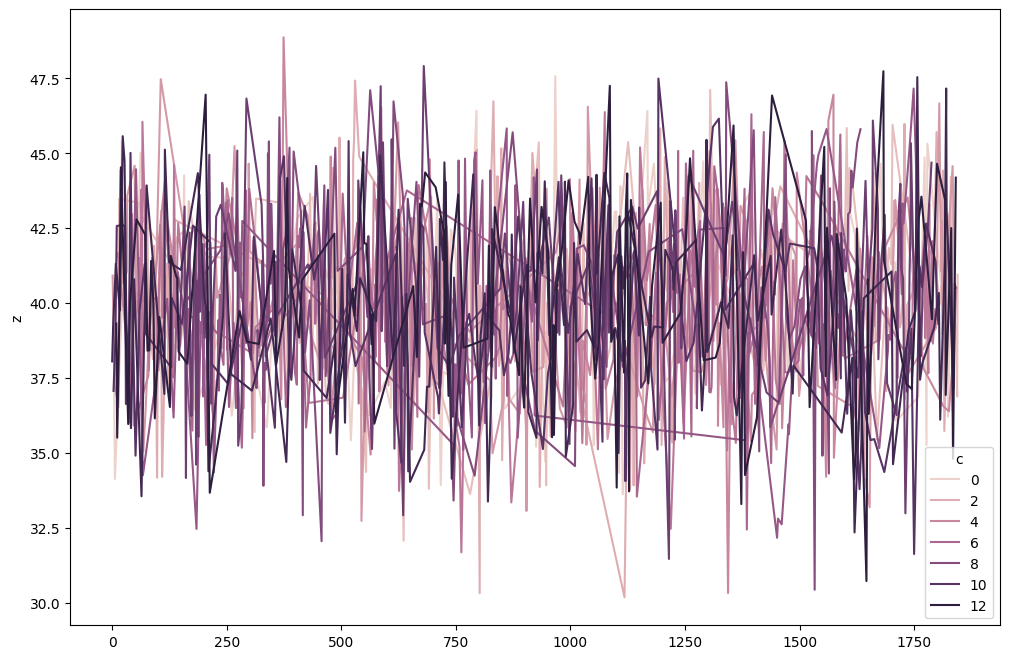

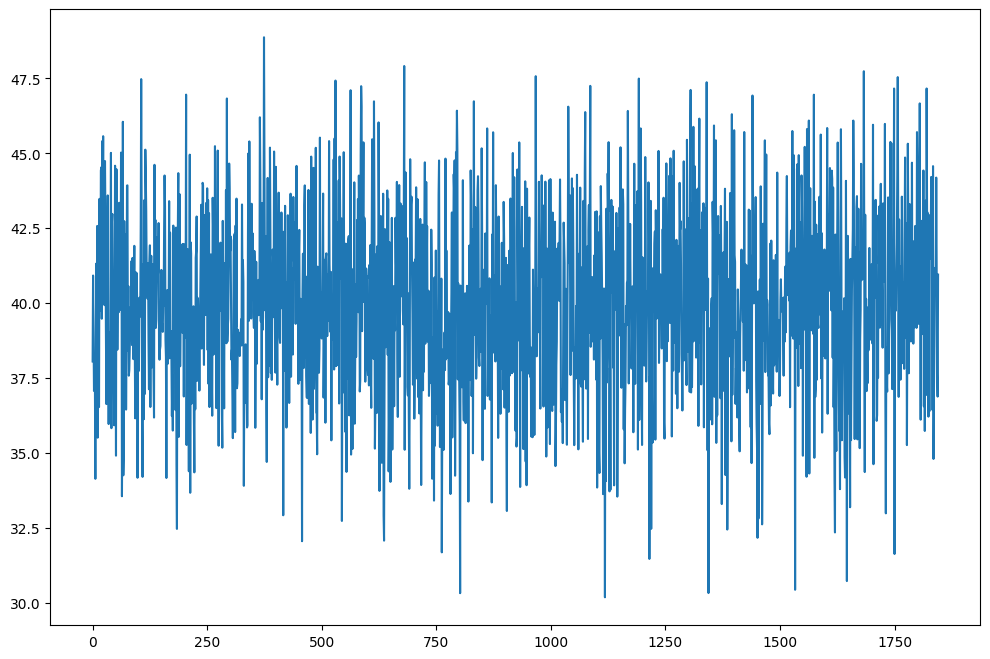

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['z'], bins=20)
plt.show()

plt.figure(figsize=(12,8))
sns.lineplot(df, x=scale, y='z', hue='c')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(scale, df['z'])
plt.show()

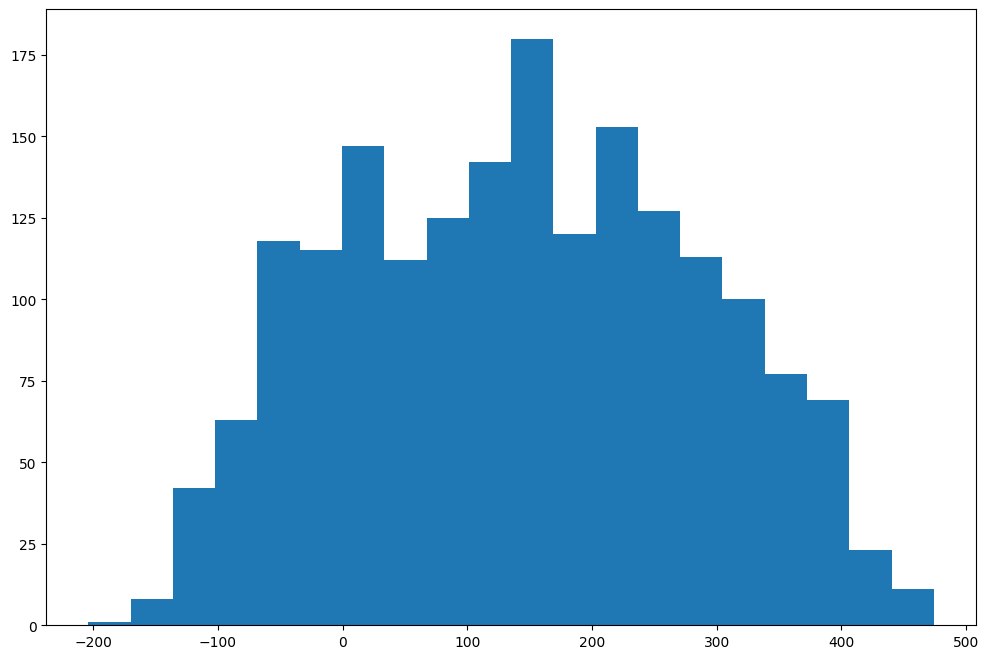

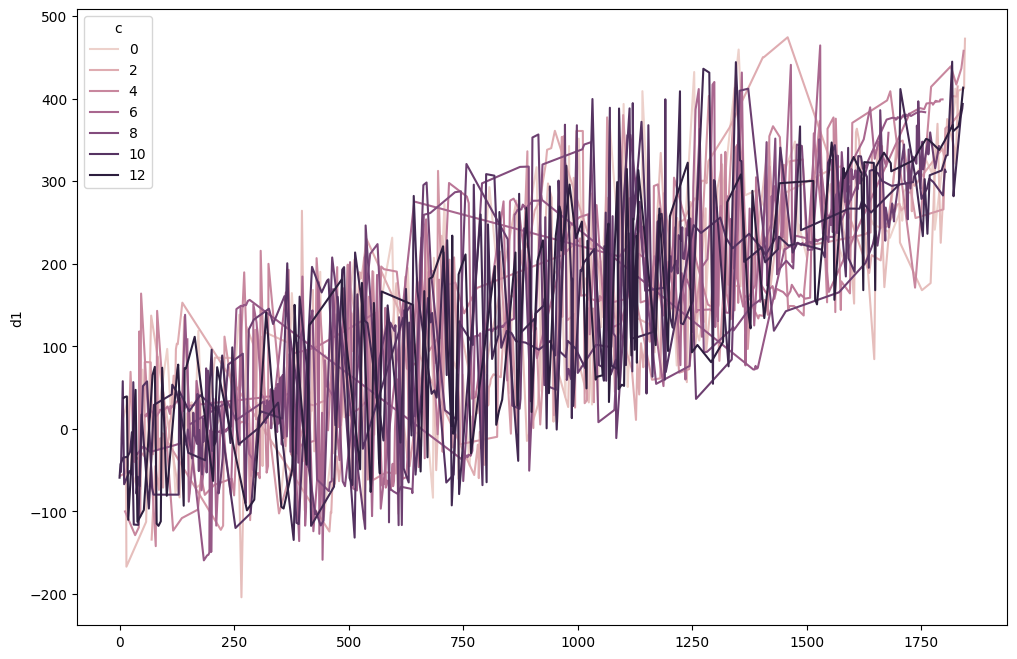

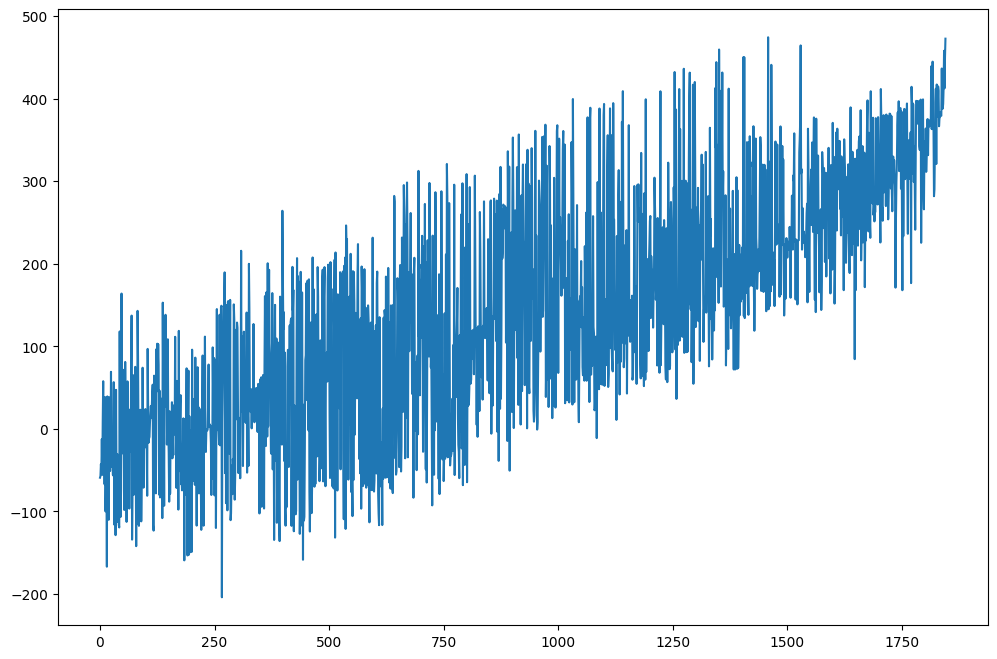

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['d1'], bins=20)
plt.show()

plt.figure(figsize=(12,8))
sns.lineplot(df, x=scale, y='d1', hue='c')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(scale, df['d1'])
plt.show()

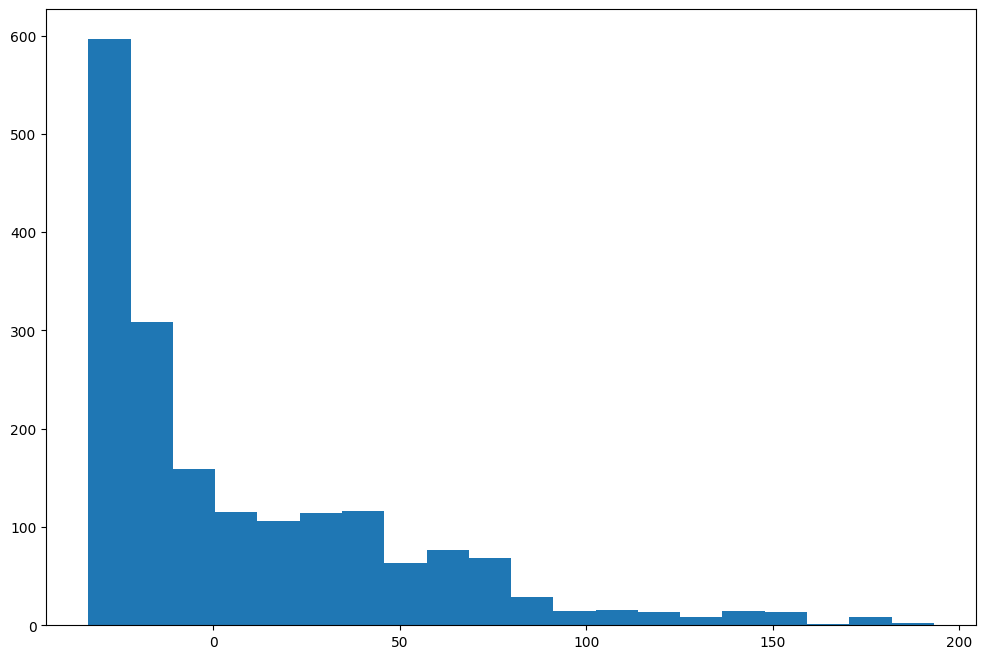

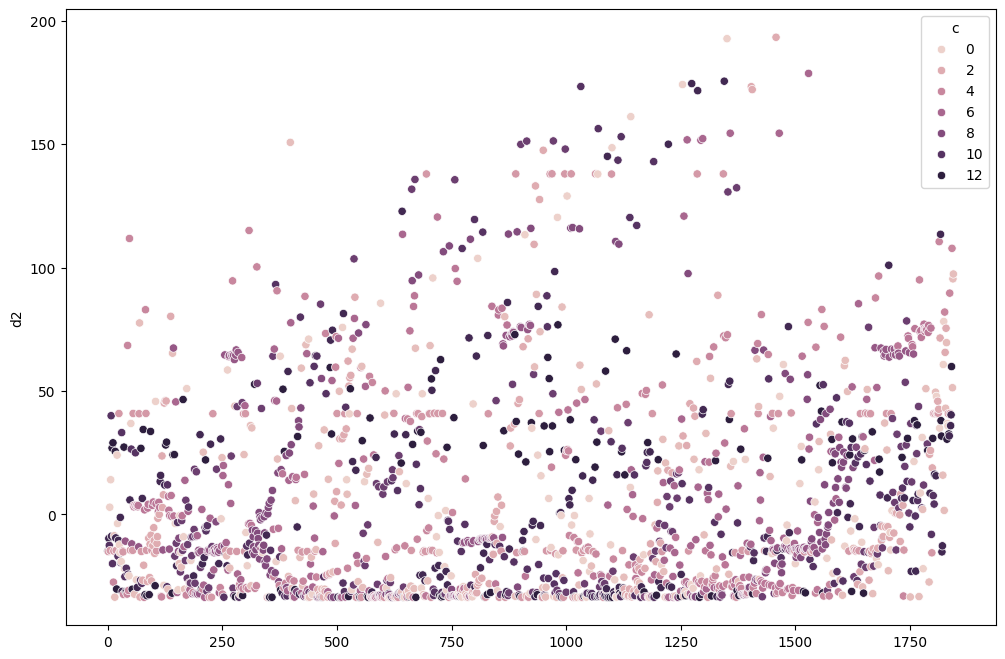

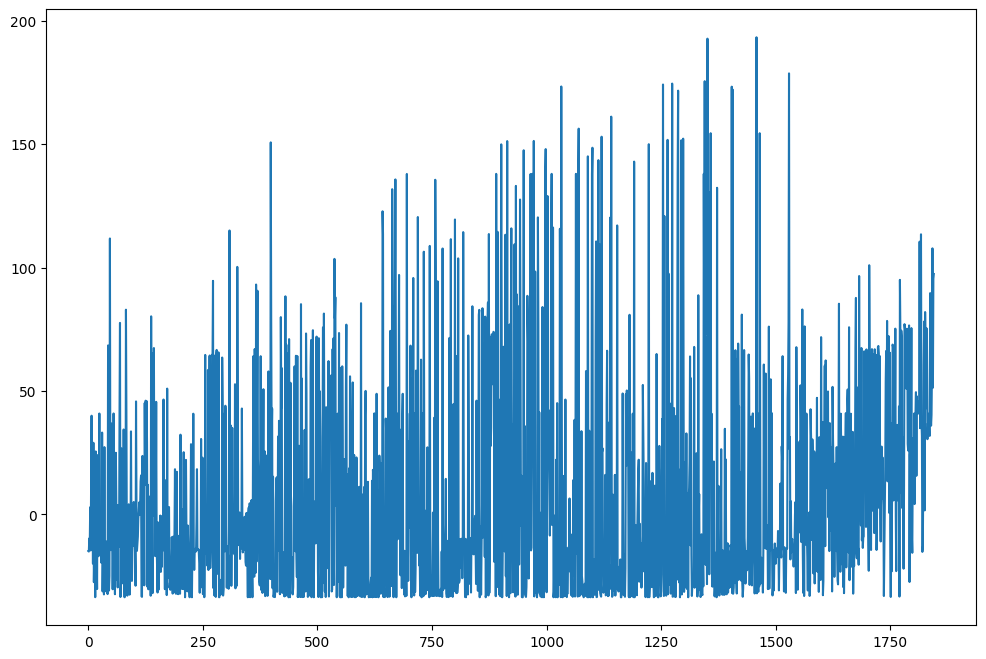

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['d2'], bins=20)
plt.show()

plt.figure(figsize=(12,8))
sns.scatterplot(df, x=scale, y='d2', hue='c')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(scale, df['d2'])
plt.show()

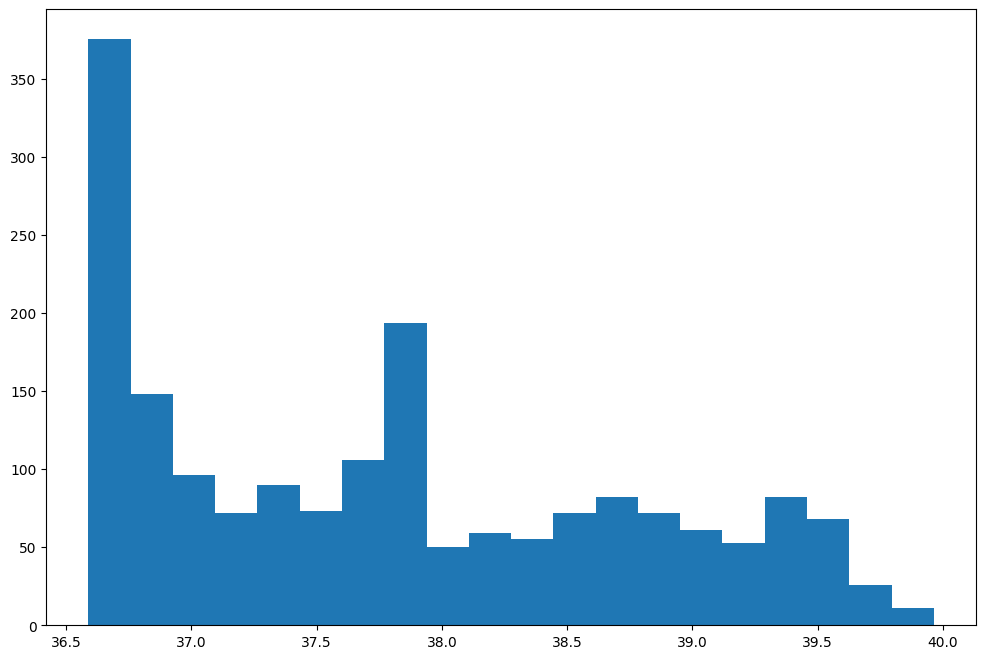

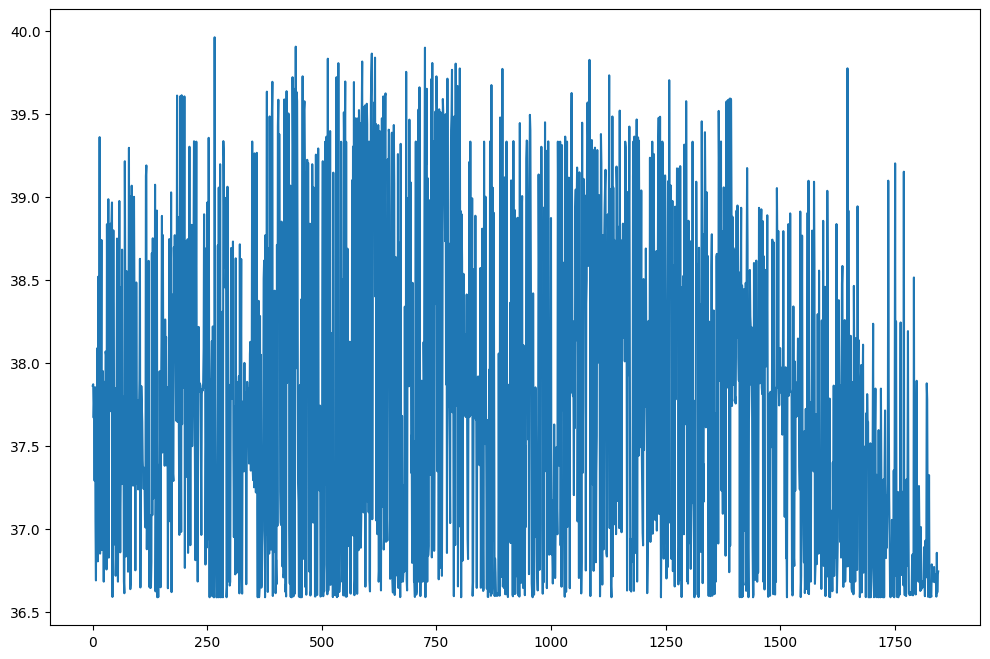

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['d3'], bins=20)
plt.show()


plt.figure(figsize=(12,8))
plt.plot(scale, df['d3'])
plt.show()

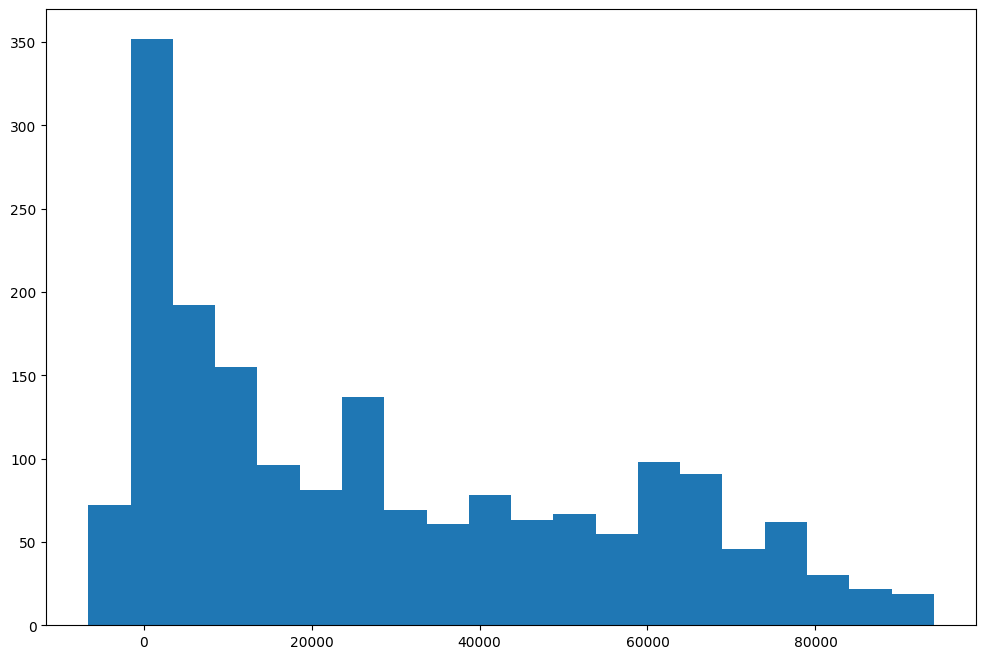

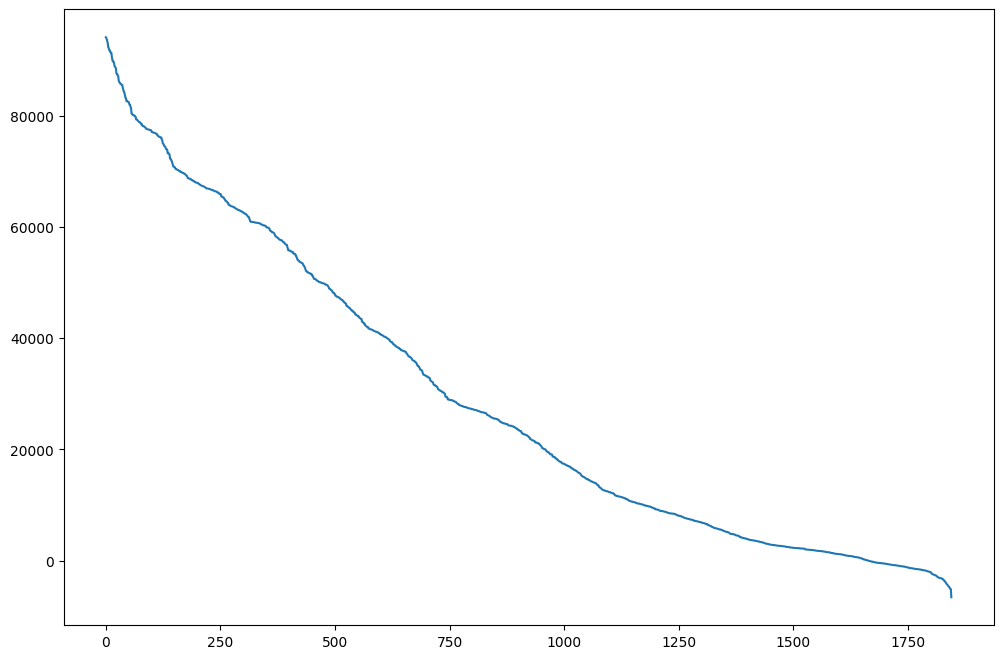

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['d4'], bins=20)
plt.show()


plt.figure(figsize=(12,8))
plt.plot(scale, df['d4'])
plt.show()

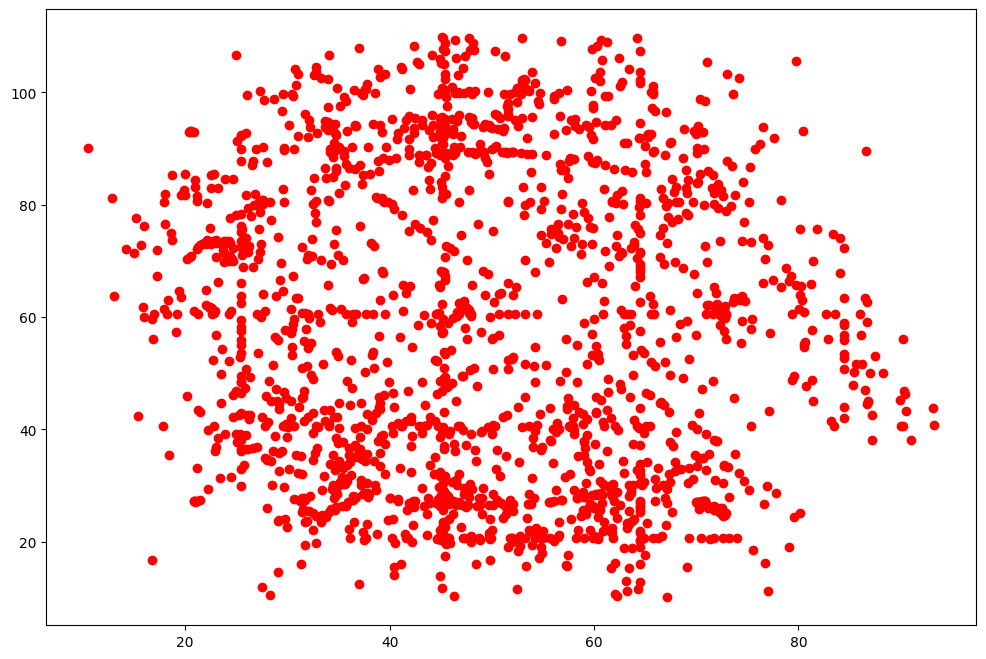

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['x'], df['y'], c='r')
plt.show()


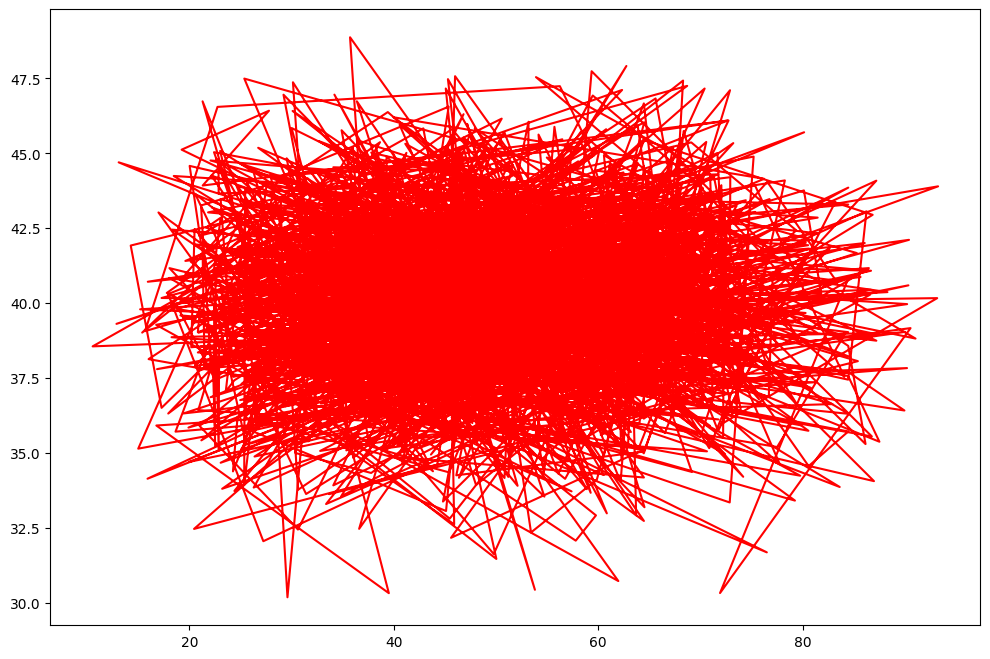

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['x'], df['z'], c='r')
plt.show()

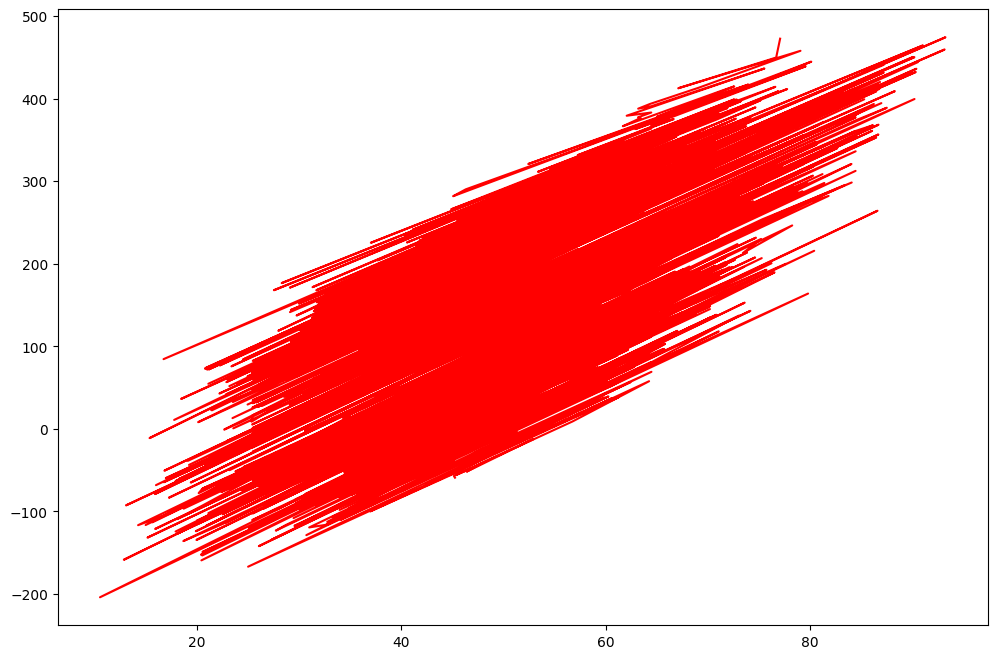

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['x'], df['d1'], c='r')
plt.show()

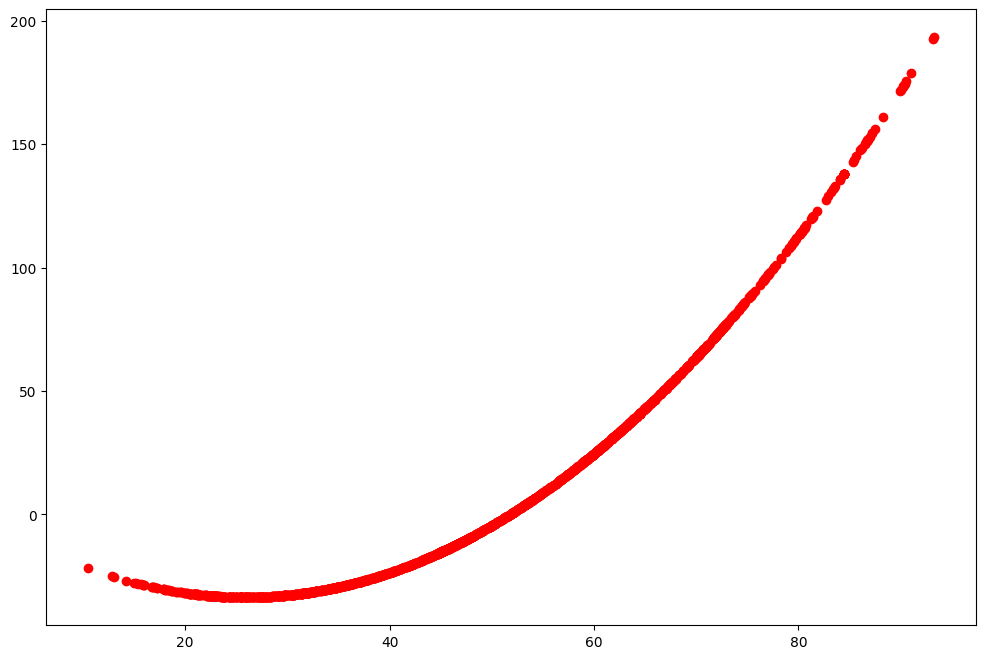

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['x'], df['d2'], c='r')
plt.show()

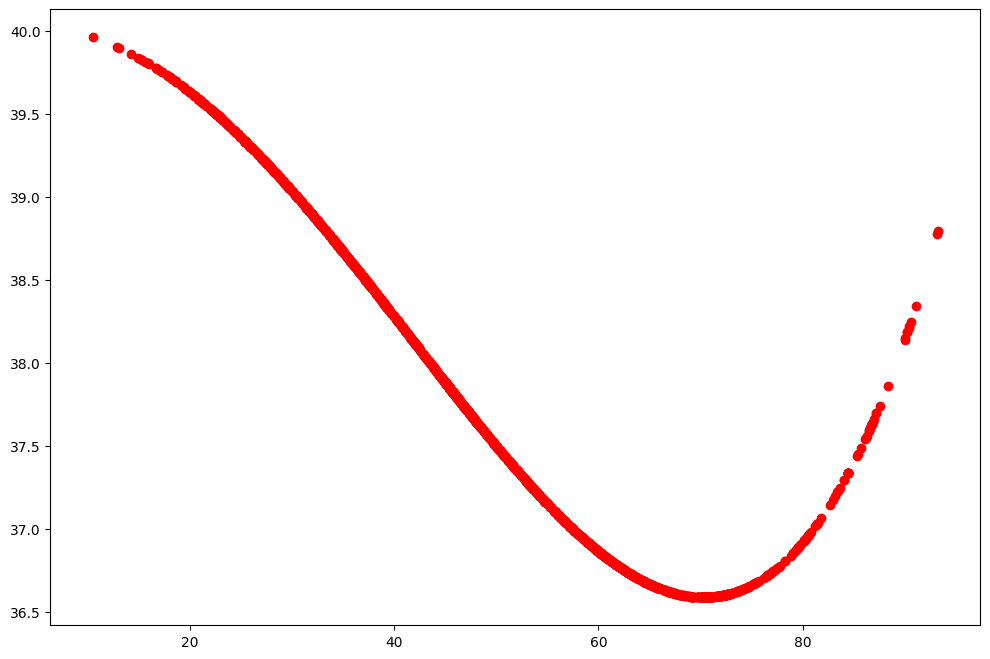

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['x'], df['d3'], c='r')
plt.show()

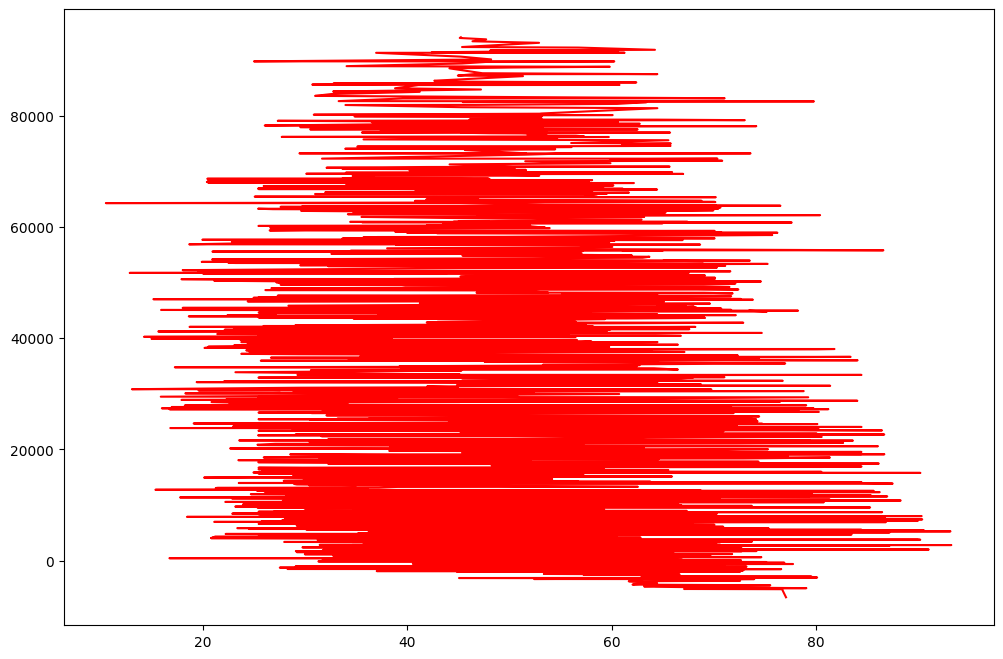

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['x'], df['d4'], c='r')
plt.show()

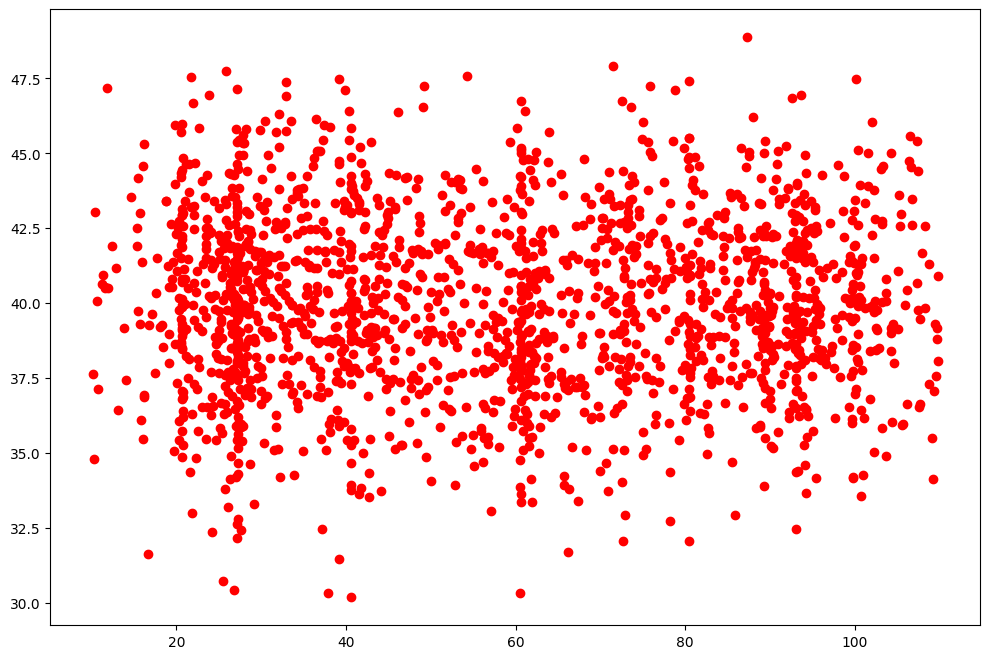

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['y'], df['z'], c='r')
plt.show()

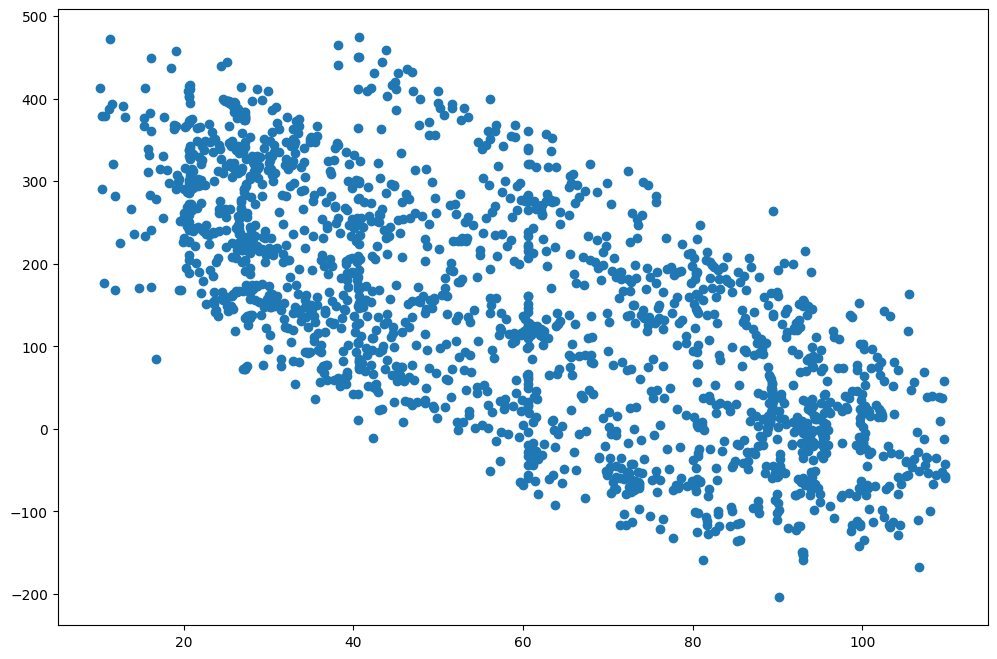

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['y'], df['d1'])
plt.show()

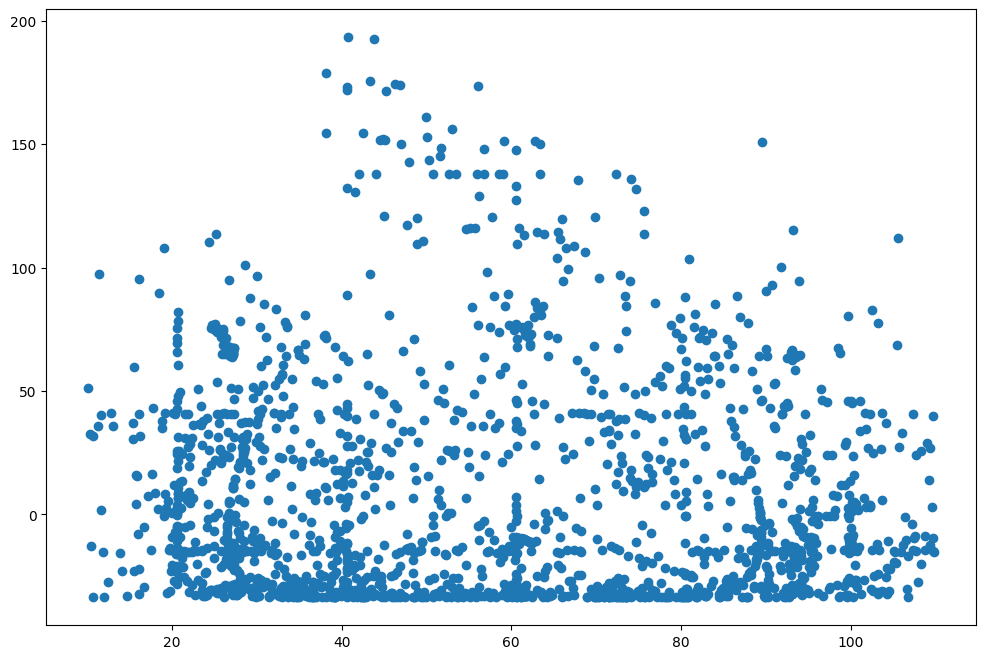

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['y'], df['d2'])
plt.show()

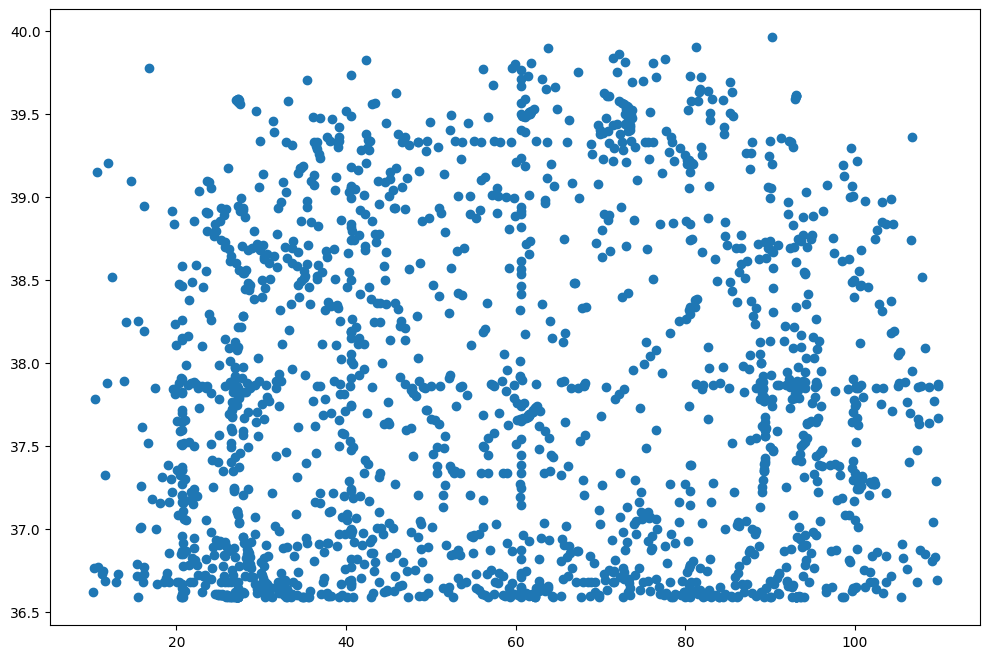

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['y'], df['d3'])
plt.show()

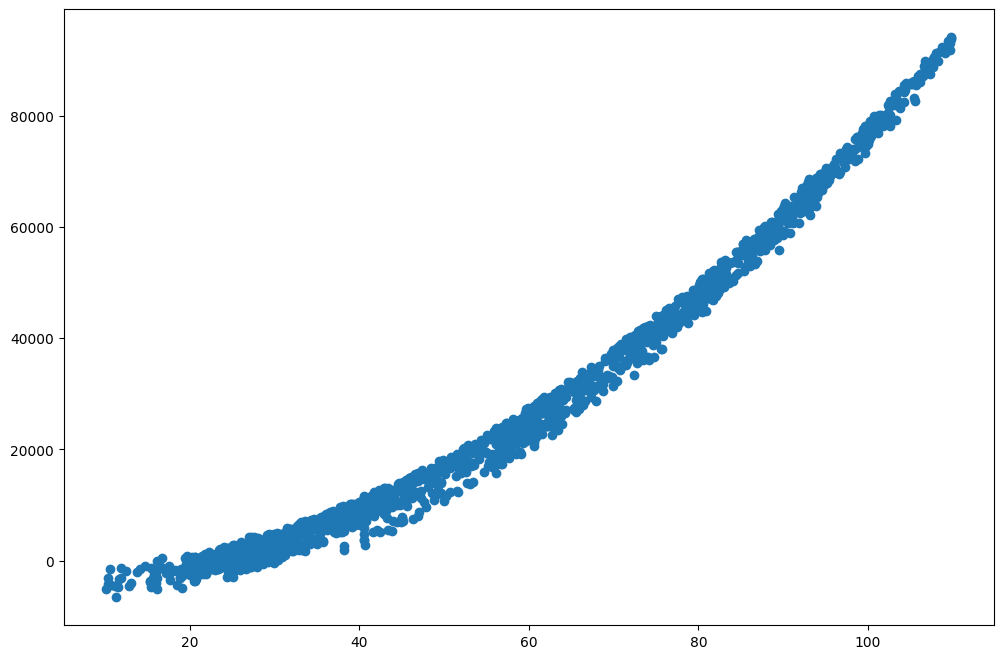

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['y'], df['d4'])
plt.show()

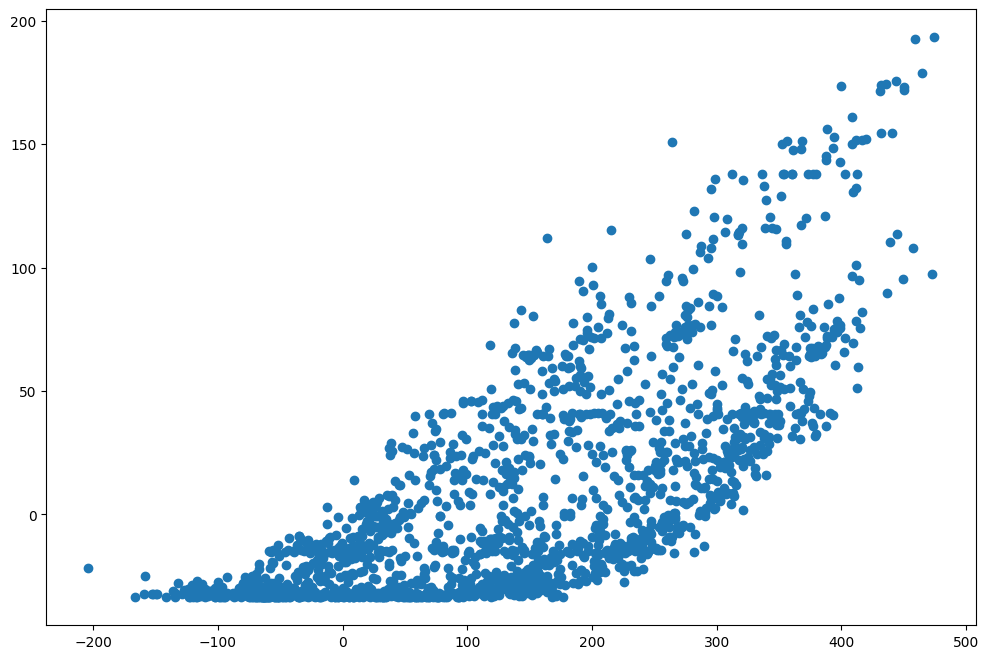

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['d1'], df['d2'])
plt.show()

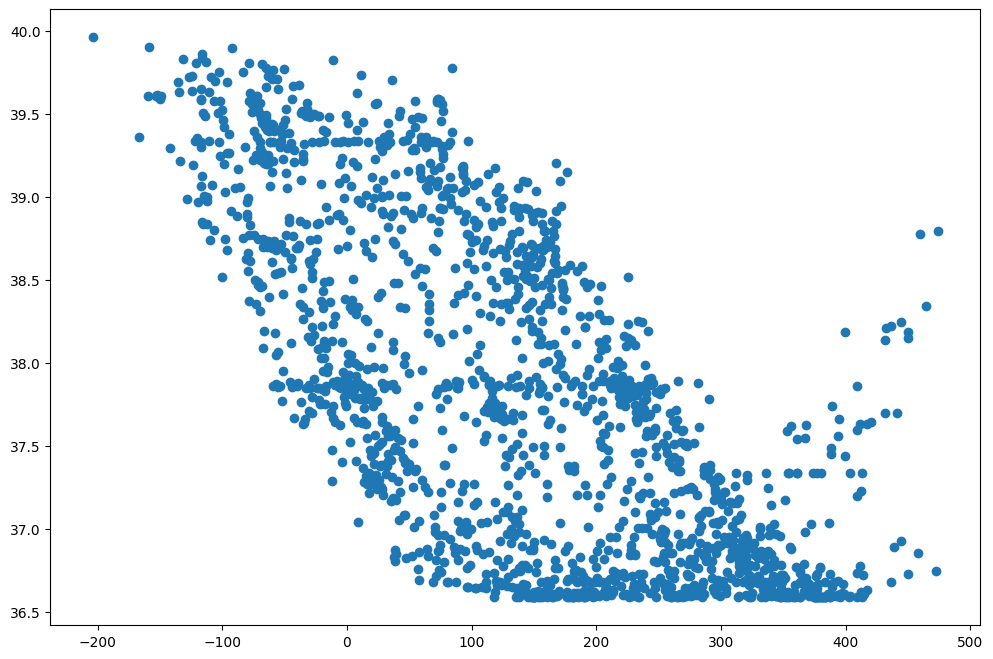

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['d1'], df['d3'])
plt.show()

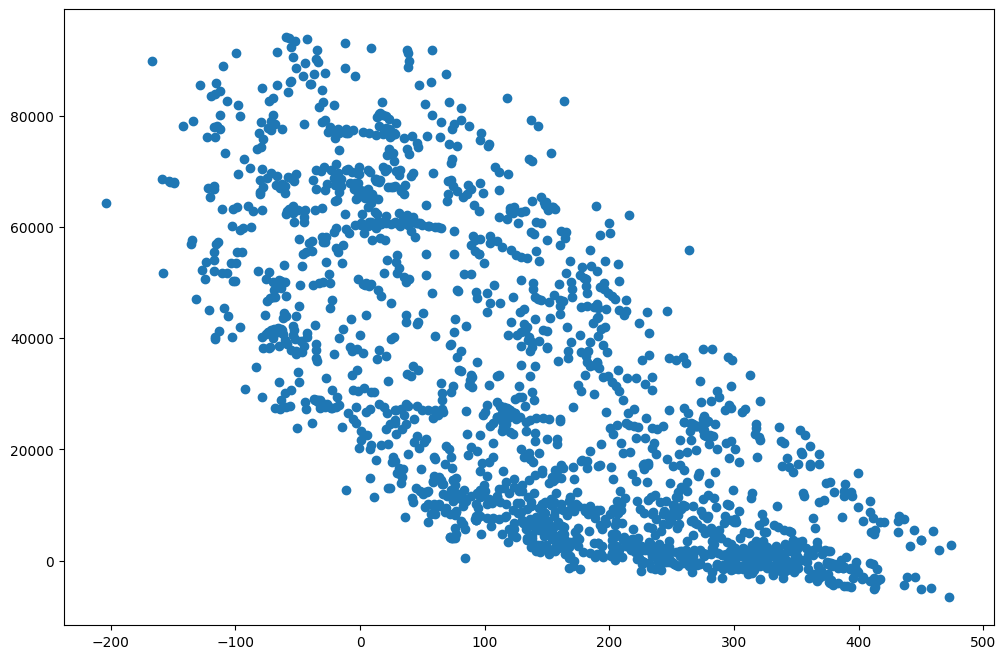

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['d1'], df['d4'])
plt.show()

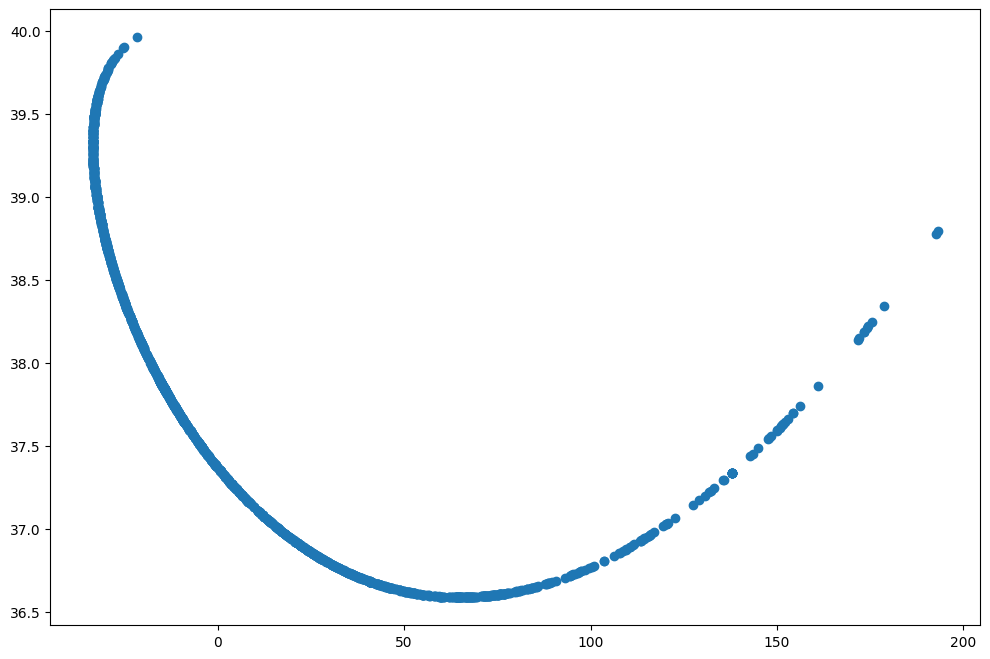

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['d2'], df['d3'])
plt.show()

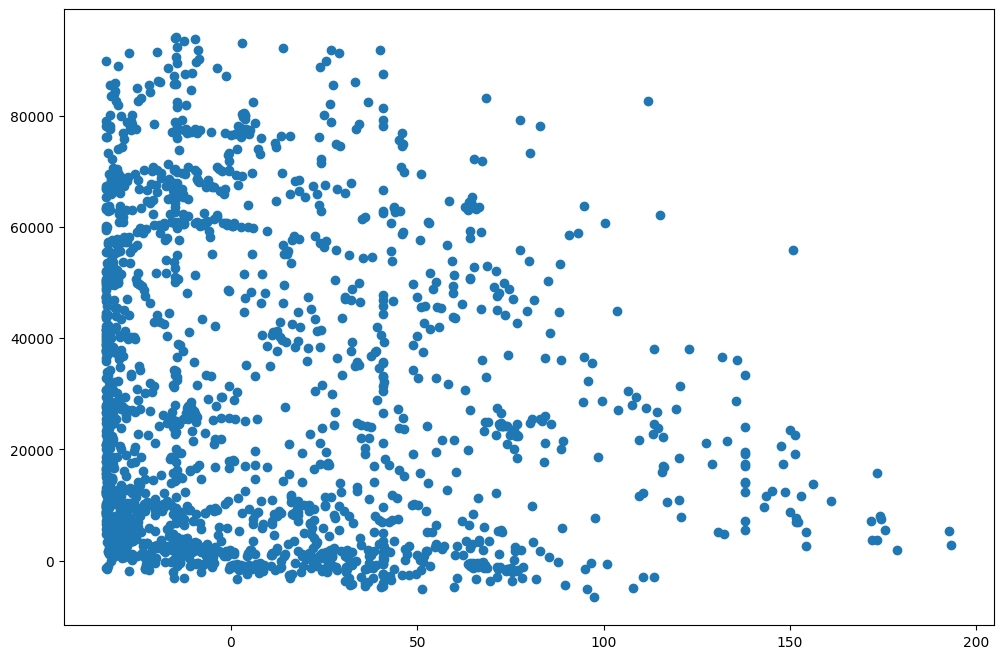

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['d2'], df['d4'])
plt.show()

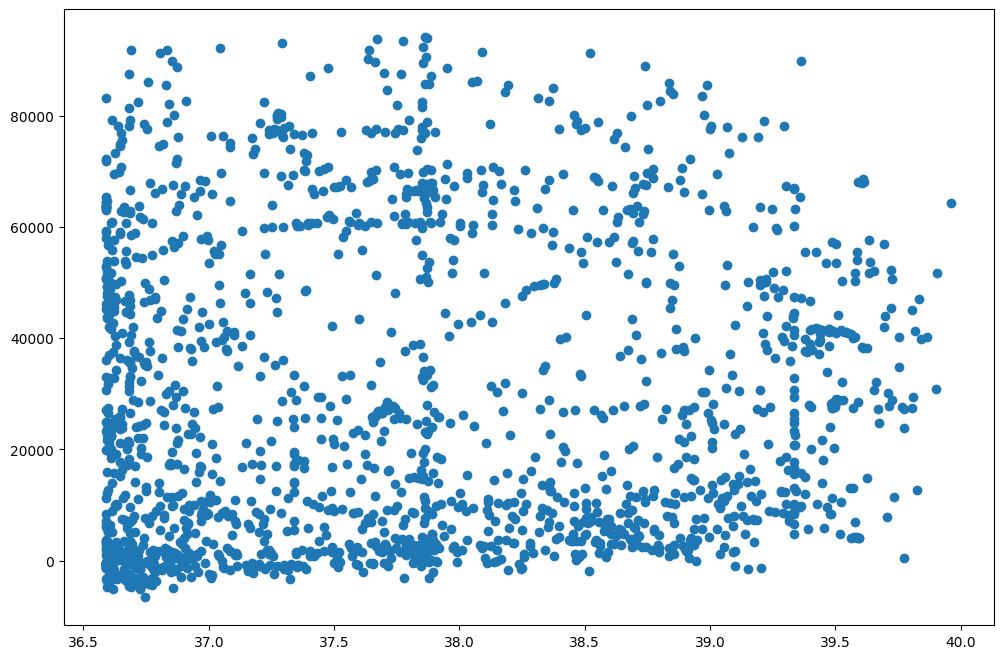

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['d3'], df['d4'])
plt.show()

In [ ]:
test = pd.DataFrame()
test['x*y*z'] = np.log(df['x'] * df['y'] * df['z'])
test['scale'] = np.arange(len(test))
test['c'] = df['c']
test['d'] = np.log(df['d1'] * df['d2'] * df['d3'] * df['d4'])
test['x*y*z']

c:\Users\liamc\Downloads\CS577_A4\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       12.149793
1       12.220398
2       12.231879
3       12.144880
4       12.292045
          ...    
1849    10.763334
1850    11.021902
1851    10.150607
1852    10.729886
1853    10.484678
Name: x*y*z, Length: 1846, dtype: float64

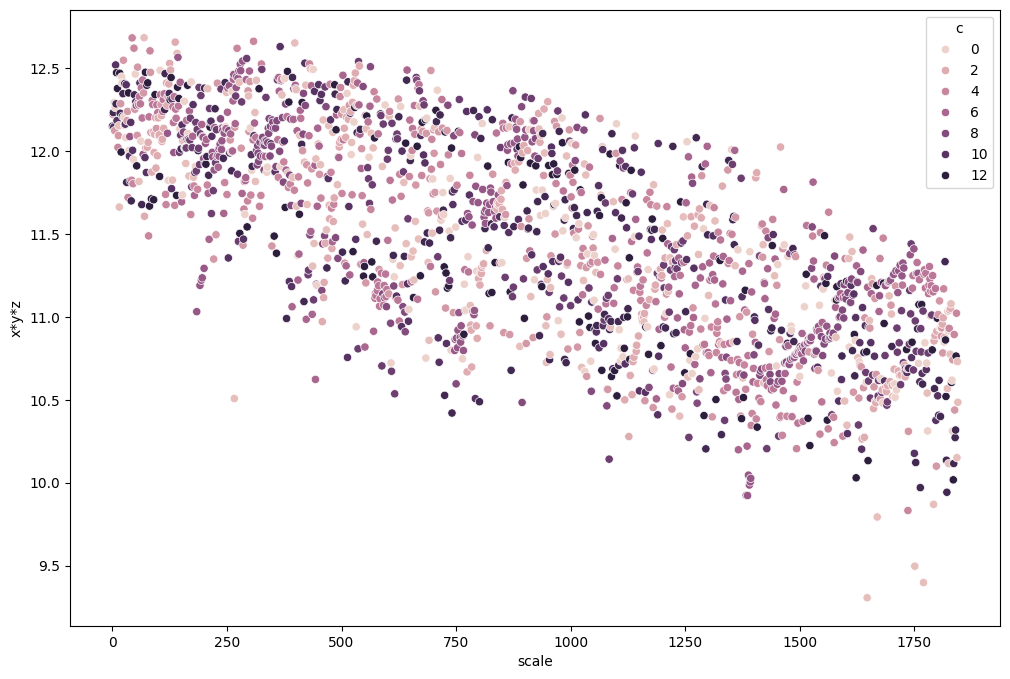

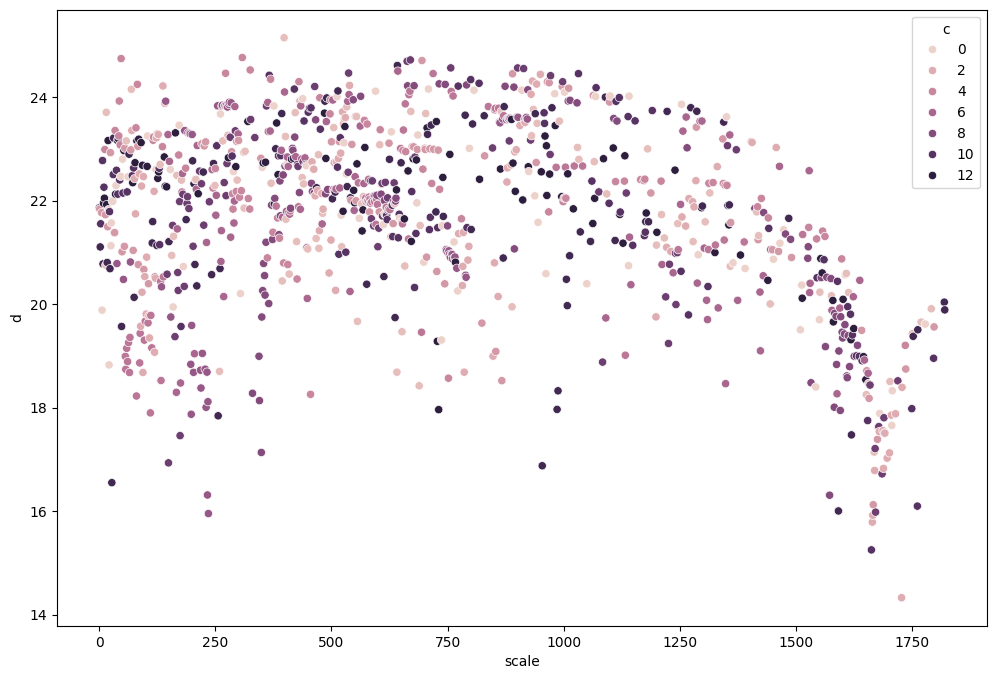

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=test, x='scale', y='x*y*z', hue='c')
plt.show()


plt.figure(figsize=(12,8))
sns.scatterplot(data=test, x='scale', y='d', hue='c')
plt.show()
#  * df['d1'] * df['d2'] * df['d3'] * df['d4']